#                                               Final Evaluation IA-M2 


Amadou Samba DIOUM                                                                                        



#                                          Machine Learning Specialist

# objectifs:
#Utilisation de Data Mining pour prédire les performances des élèves
#Classification binaire sur la variable "finalResult" 
#Classification multivariée sur la variable "academicGrade" 
#regression lineaire avec la variable G3

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## importer les biblioteques

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Charger l'ensemble de données. 



In [2]:
fichier=r"C:\Users\T2N\Desktop\projet_ML\student-mat.csv"
df1 = pd.read_csv(fichier, index_col=0)




In [3]:
df1.shape

(395, 32)

In [4]:
fichier=r"C:\Users\T2N\Desktop\projet_ML\student-mat.csv"
df2 = pd.read_csv(fichier, index_col=0)

In [5]:
df2.shape

(649, 32)

# 2. Ajouter une variable catégorielle binaire appelée "finalResult"

In [6]:
def func(x):
    if x>=10:
        return "pass" 
    else:
        return 'fail'
df1['finalResult'] = df1["G3"].apply(func)

In [7]:
df1['finalResult'].value_counts()

pass    265
fail    130
Name: finalResult, dtype: int64

In [13]:
#transformation en variable binaire

In [8]:
def func(x):
    if x>=10:
        return "pass" 
    else:
        return 'fail'
df2['finalResult'] = df2["G3"].apply(func)

# 3. Ajoutez une variable catégorielle appelée "academicGrade"

In [9]:
def func(x):
    if 16<= x <=20 : 
        return "A"
    elif 14<=x <=15 :
        return "B"
    elif  12<= x <=13 :
        return "C"
    elif  10<= x <=11 :
        return "D"
    else:
        return "E"

df1['academicGrade'] = df1['G3'].apply(func)




In [10]:
def func(x):
    if 16<= x <=20 : 
        return "A"
    elif 14<=x <=15 :
        return "B"
    elif  12<= x <=13 :
        return "C"
    elif  10<= x <=11 :
        return "D"
    else:
        return "E"

df2['academicGrade'] = df2['G3'].apply(func)

In [11]:
df2["academicGrade"].value_counts()

D    201
C    154
B    112
E    100
A     82
Name: academicGrade, dtype: int64

# 4-analyse exploratoire complète 

# - concatination des tables de données

In [12]:
df5 = pd.concat([df1, df2], axis=0)

In [13]:
df5

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,finalResult,academicGrade
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,1,1,3,6,5,6,6,fail,E
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,3,1,1,3,4,5,5,6,fail,E
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,2,2,3,3,10,7,8,10,pass,D
GP,F,15,U,GT3,T,4,2,health,services,home,...,2,1,1,5,2,15,14,15,pass,B
GP,F,16,U,GT3,T,3,3,other,other,home,...,2,1,2,5,4,6,10,10,pass,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,F,19,R,GT3,T,2,3,services,other,course,...,2,1,2,5,4,10,11,10,pass,D
MS,F,18,U,LE3,T,3,1,teacher,services,course,...,4,1,1,1,4,15,15,16,pass,A
MS,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,5,6,11,12,9,fail,E


In [20]:
df5.shape

(1044, 34)

In [21]:
df1.shape

(395, 34)

In [22]:
df2.shape

(649, 34)

In [23]:
395+649

1044

# -trouver le nombre des variables objects et int

In [24]:
df5.dtypes.value_counts() 

object    18
int64     16
dtype: int64

# -Trouver des données manquantes

In [25]:
df5.isna().any()

sex              False
age              False
address          False
famsize          False
Pstatus          False
Medu             False
Fedu             False
Mjob             False
Fjob             False
reason           False
guardian         False
traveltime       False
studytime        False
failures         False
schoolsup        False
famsup           False
paid             False
activities       False
nursery          False
higher           False
internet         False
romantic         False
famrel           False
freetime         False
goout            False
Dalc             False
Walc             False
health           False
absences         False
G1               False
G2               False
G3               False
finalResult      False
academicGrade    False
dtype: bool

# -trier les données int,objet et float

In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, GP to MS
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            1044 non-null   object
 1   age            1044 non-null   int64 
 2   address        1044 non-null   object
 3   famsize        1044 non-null   object
 4   Pstatus        1044 non-null   object
 5   Medu           1044 non-null   int64 
 6   Fedu           1044 non-null   int64 
 7   Mjob           1044 non-null   object
 8   Fjob           1044 non-null   object
 9   reason         1044 non-null   object
 10  guardian       1044 non-null   object
 11  traveltime     1044 non-null   int64 
 12  studytime      1044 non-null   int64 
 13  failures       1044 non-null   int64 
 14  schoolsup      1044 non-null   object
 15  famsup         1044 non-null   object
 16  paid           1044 non-null   object
 17  activities     1044 non-null   object
 18  nursery        1044 non-null   obj

# - confirmer les variables objet,int et float

c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

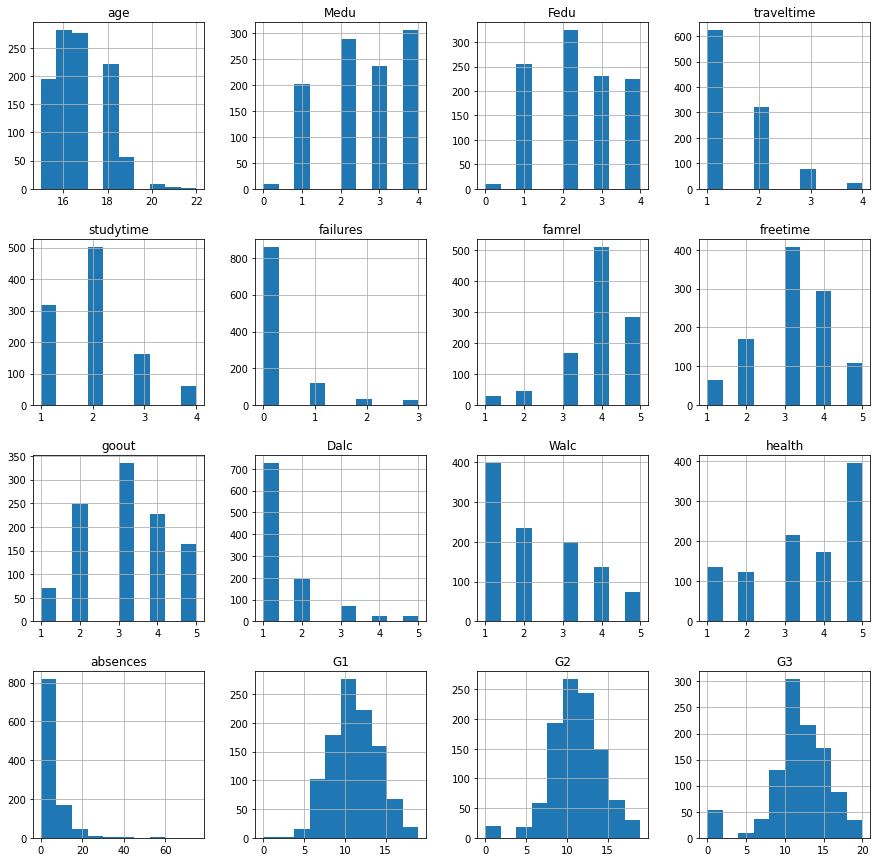

In [40]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 15

df5.hist()

# -trier les données par types

In [14]:
categorical_cols=["sex",'address', 'famsize', 'Pstatus','Mjob',
       'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic'  ]

In [15]:
numerical_cols=["age",'Medu', 'Fedu','traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3']

# -la description des données

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [30]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [31]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


# -correlation des variables


In [35]:
df5.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


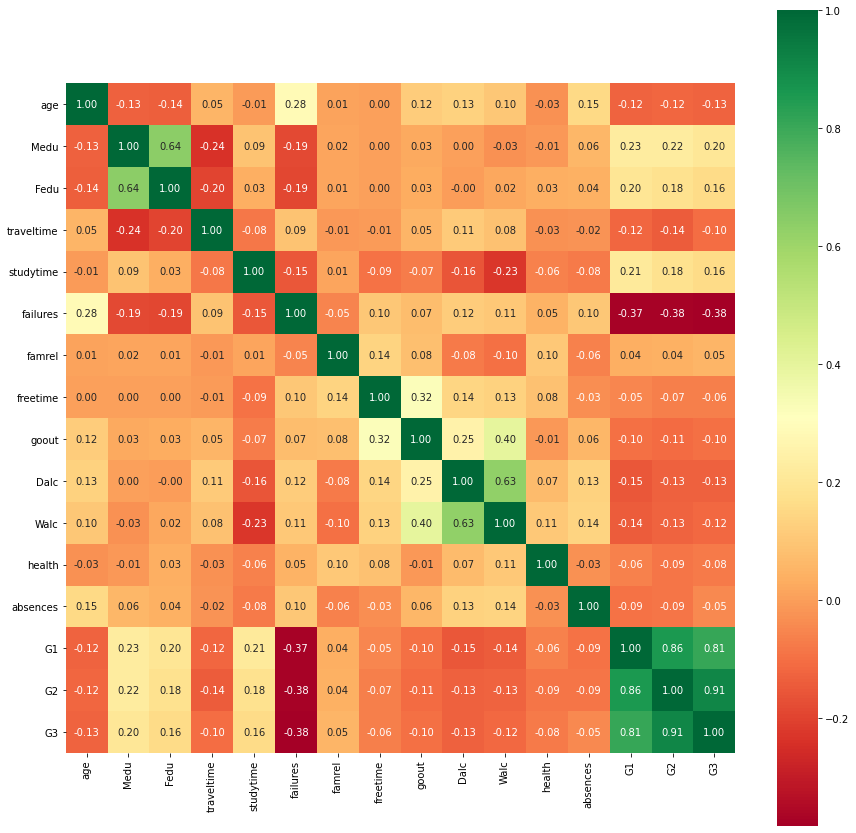

In [36]:

from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 15
p=sns.heatmap(df5.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

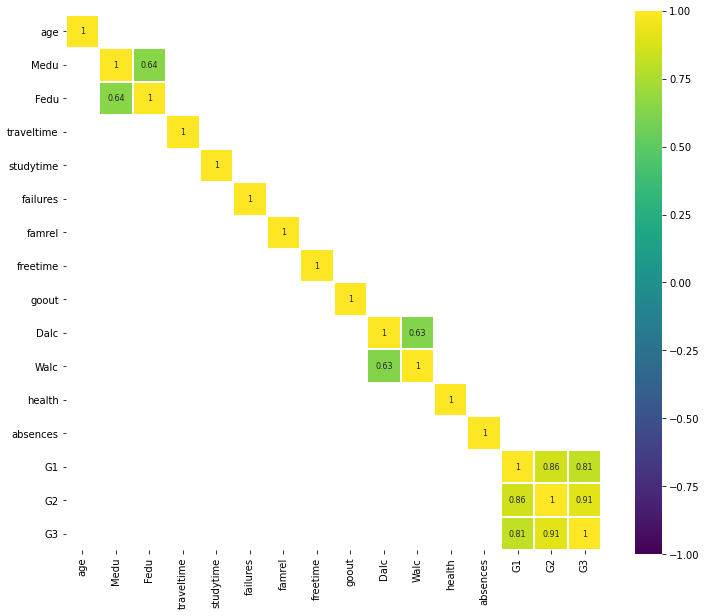

In [314]:

corr = df5.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [55]:
df5.corr()["G3"]*100


age           -12.528243
Medu           20.147169
Fedu           15.979605
traveltime    -10.262712
studytime      16.162894
failures      -38.314528
famrel          5.446106
freetime       -6.488968
goout          -9.787726
Dalc          -12.964212
Walc          -11.574000
health         -8.007864
absences       -4.567058
G1             80.914172
G2             91.074316
G3            100.000000
Name: G3, dtype: float64

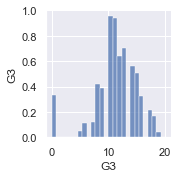

In [50]:
sns.pairplot(df5[['G3']]);

In [51]:
def plot_corr(df5, annot=True):
    _, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(
        df5.corr(),
        annot=annot,
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
        ax=ax
    )


def plot_histplot(column):
    sns.histplot(x=column, color='#65b87b', alpha=.7)
def plot_countplot(df, column_name, ax=None):
    _df5 = df5[[column_name]].copy()
    if len(_df5[_df5[column_name].isnull()]):
        _df5.fillna('NaN', inplace=True)
    
    color = '#42b0f5' if ax != None else '#7661ff'
    bsns.countplot(x=column_name, data=_df, color=color, alpha=.7, ax=ax)
    del _df    

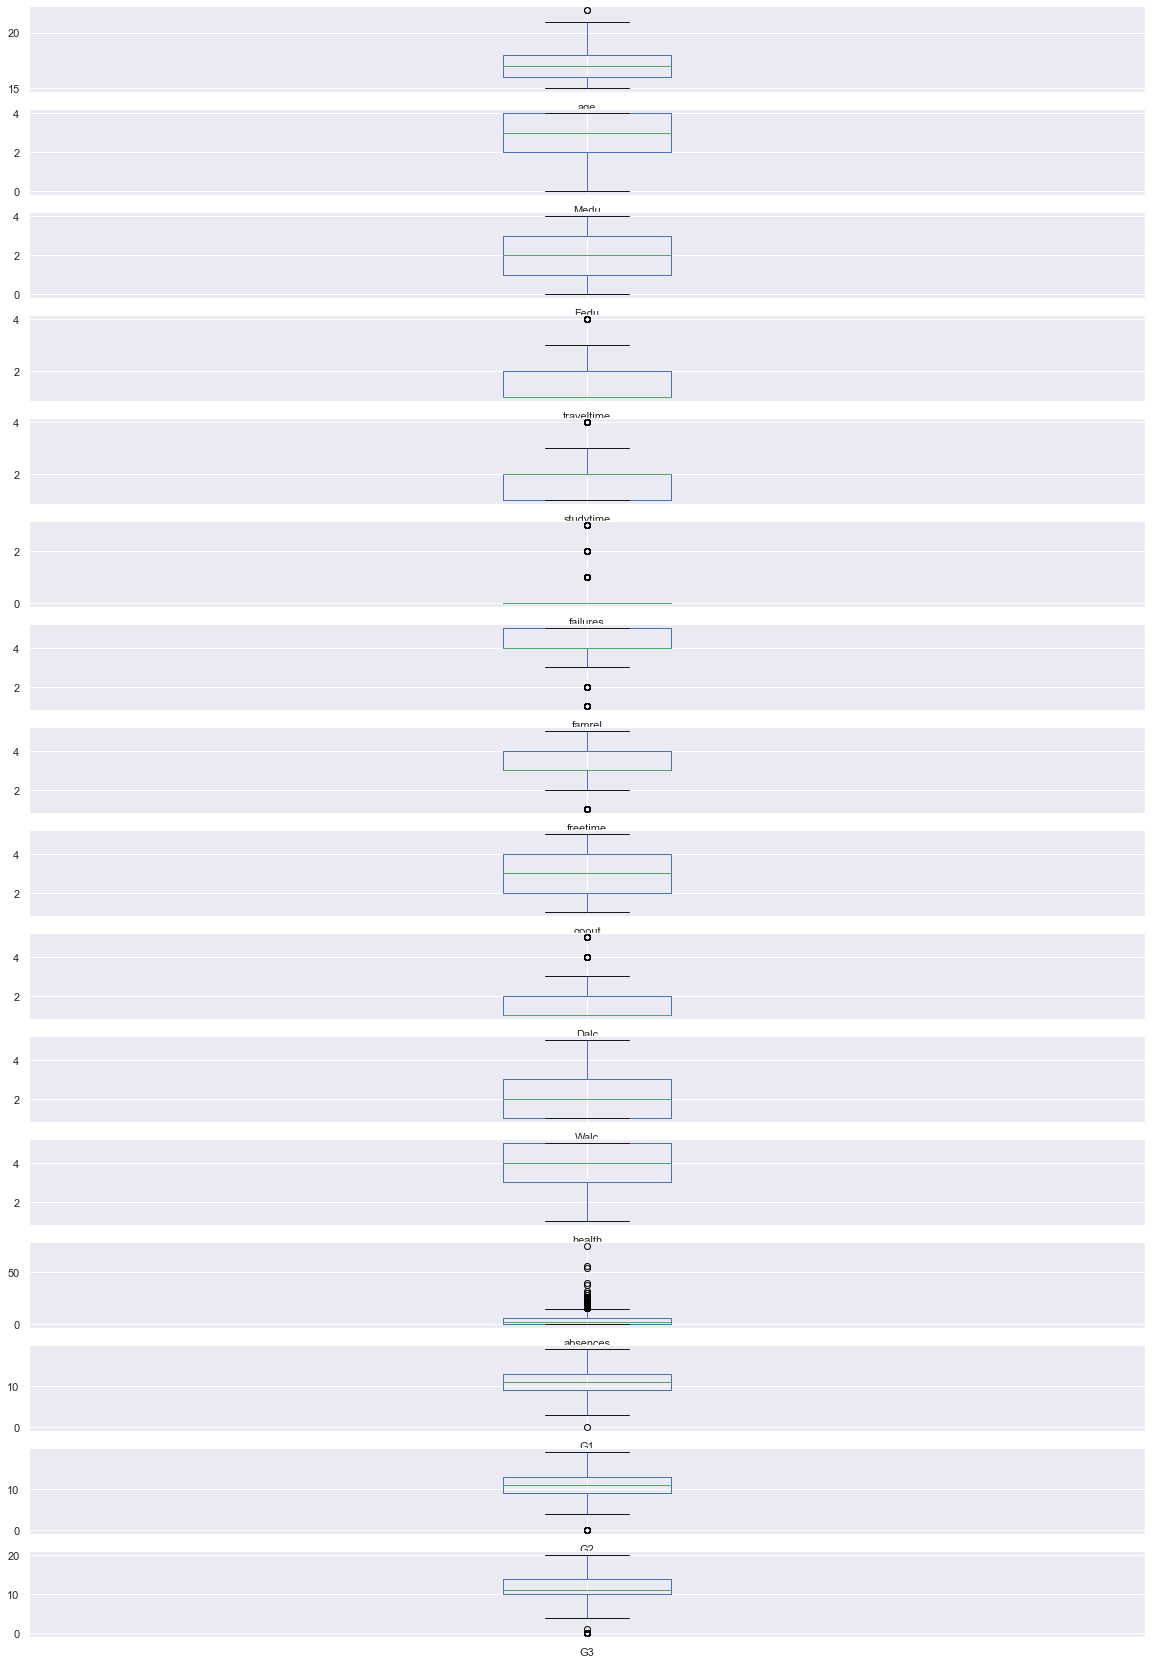

In [52]:
df5.plot(kind='box', subplots=True, layout=(16,1), sharex=False, sharey=False, figsize=(20,30))
plt.show()

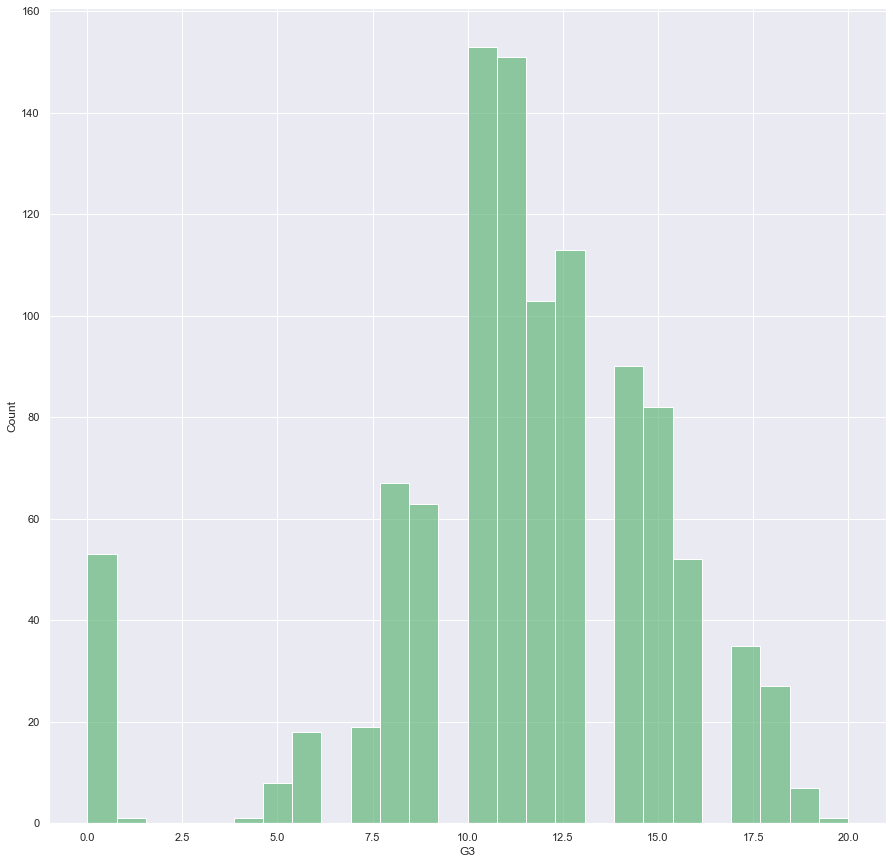

In [69]:
plot_histplot(df5['G3'])

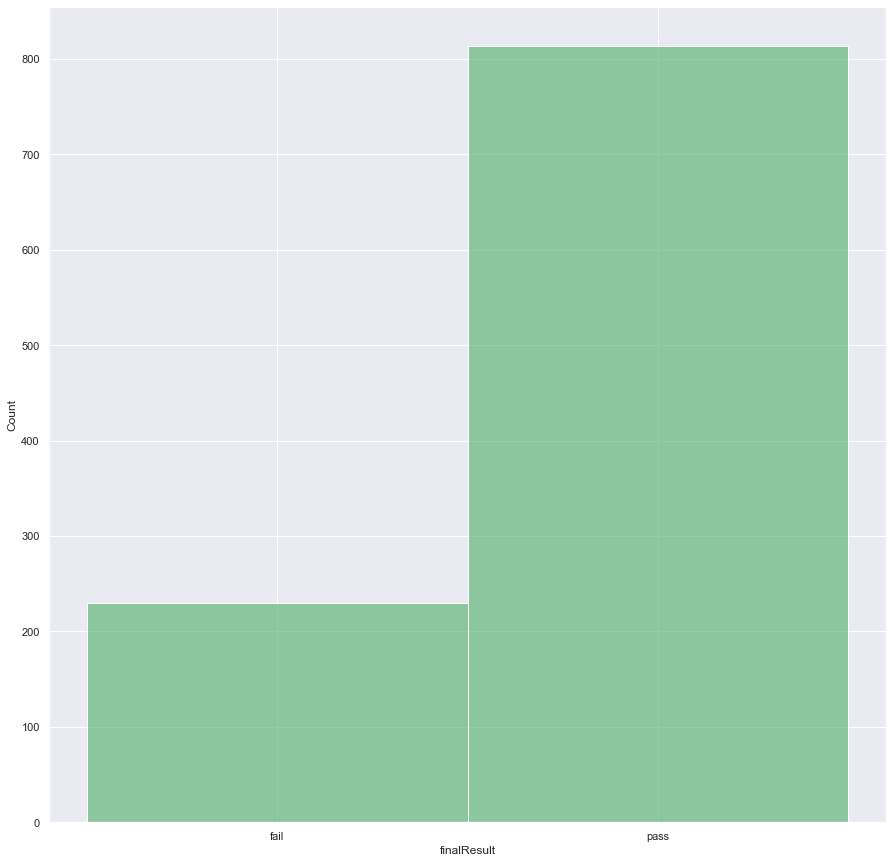

In [70]:
plot_histplot(df5['finalResult'])

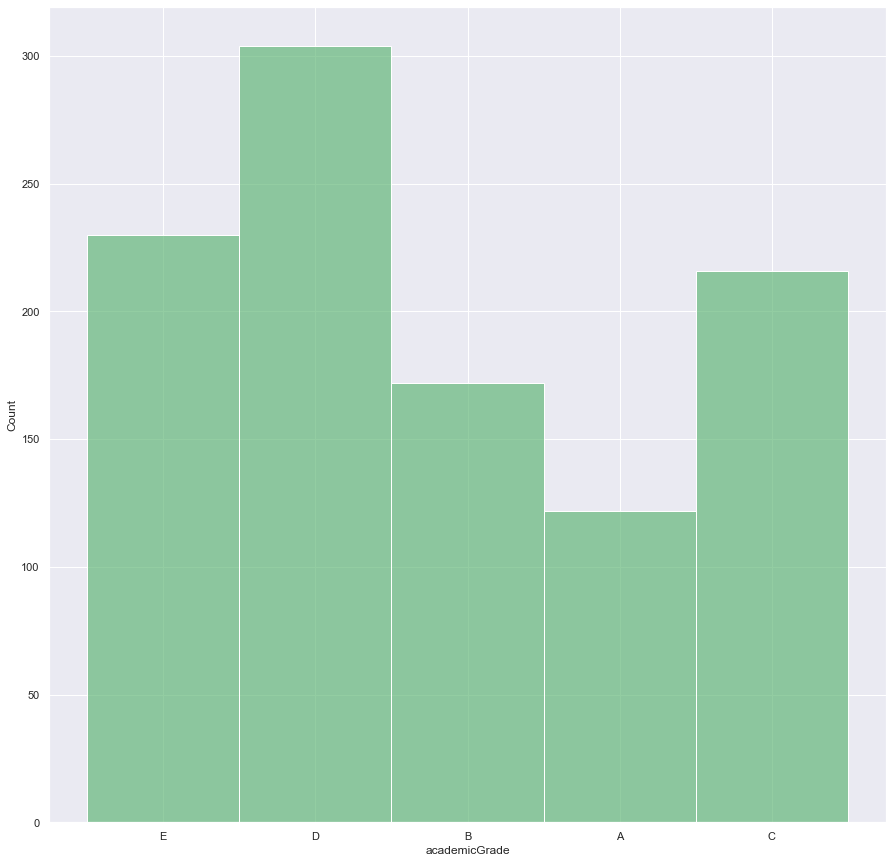

In [71]:
plot_histplot(df5['academicGrade'])

<AxesSubplot:xlabel='G3', ylabel='Count'>

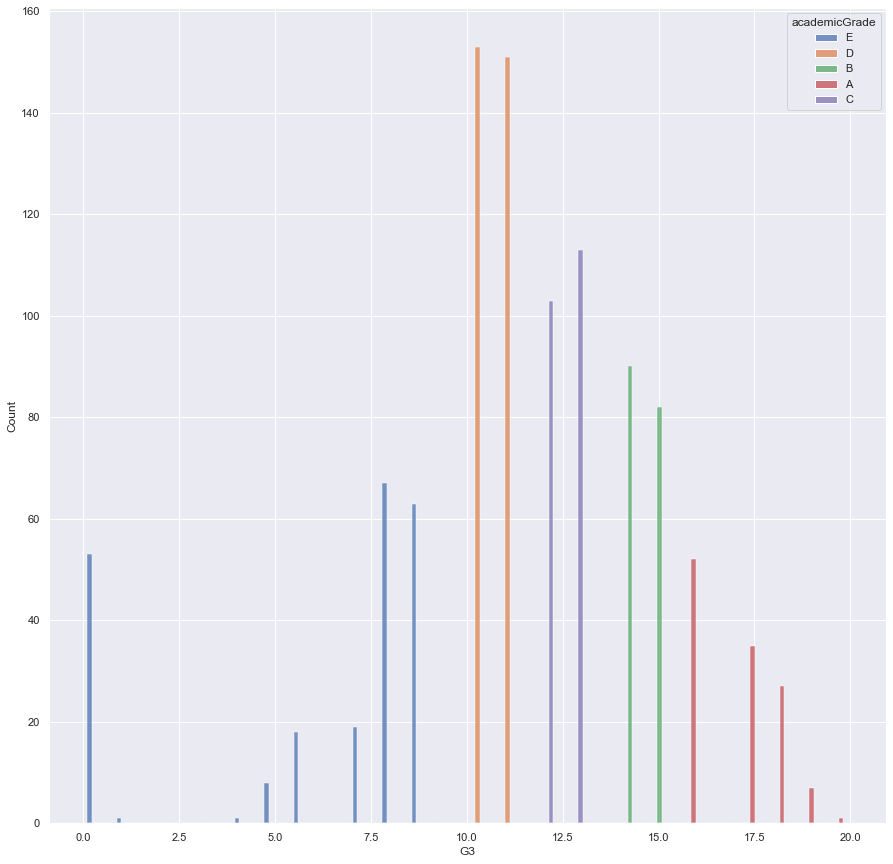

In [78]:

sns.histplot(data=df5, x="G3", hue="academicGrade", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='G3', ylabel='Count'>

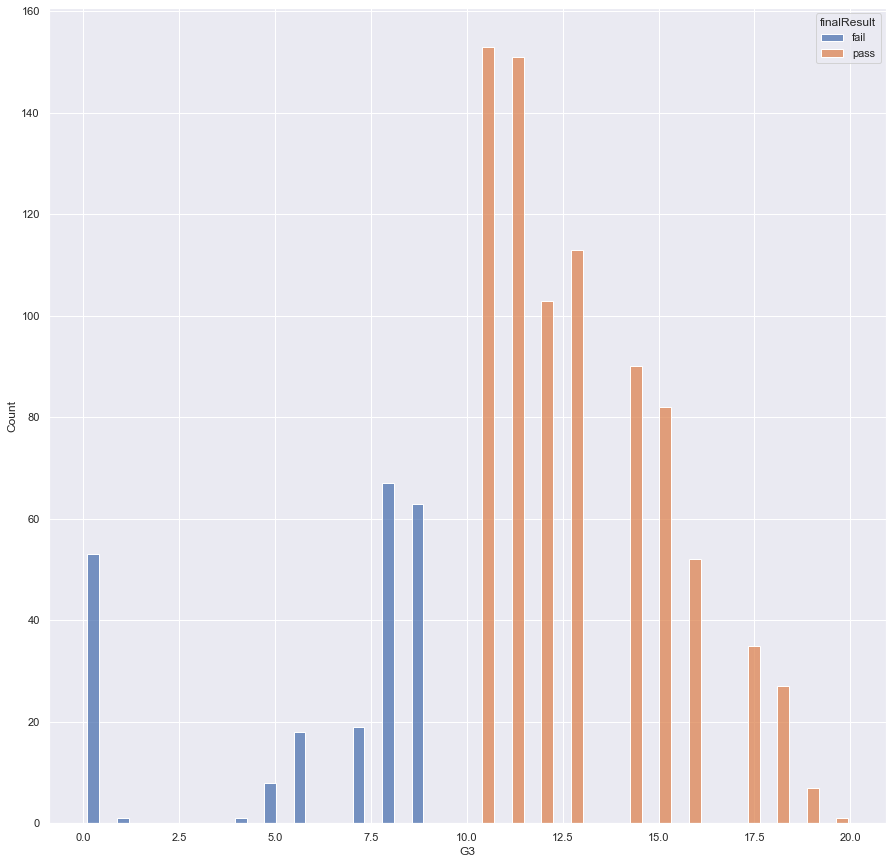

In [79]:
sns.histplot(data=df5, x="G3", hue="finalResult", multiple="dodge", shrink=.8)

# -pour afficher les variables numeriques dans la base 

<AxesSubplot:ylabel='Count'>

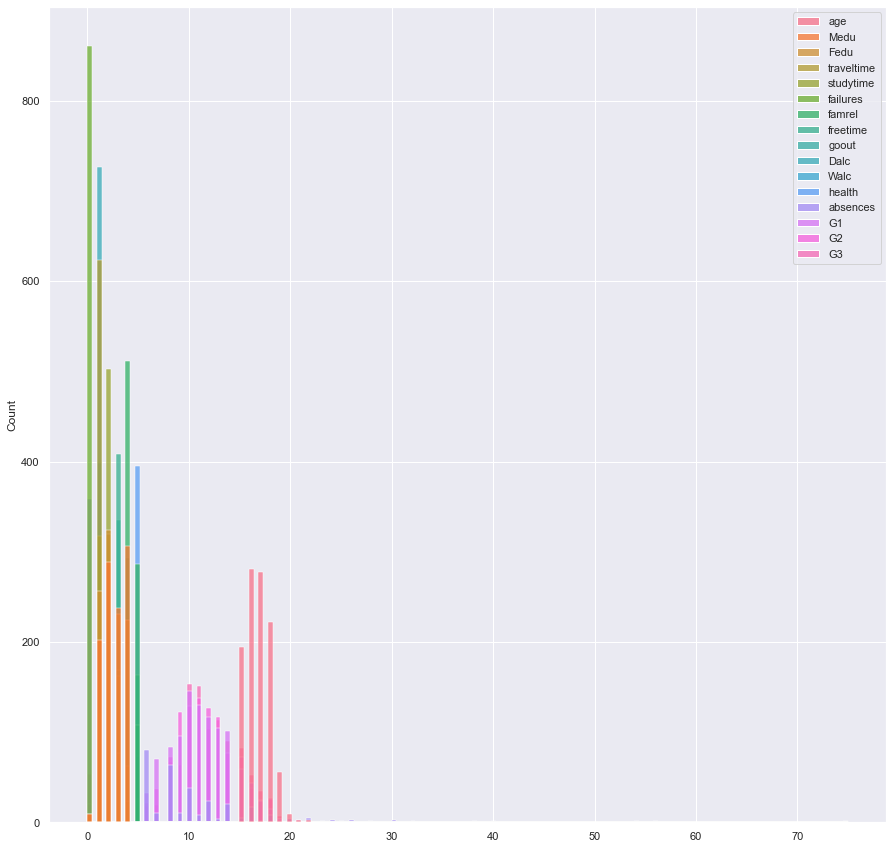

In [80]:
sns.histplot(data=df5) 

<AxesSubplot:xlabel='finalResult', ylabel='Count'>

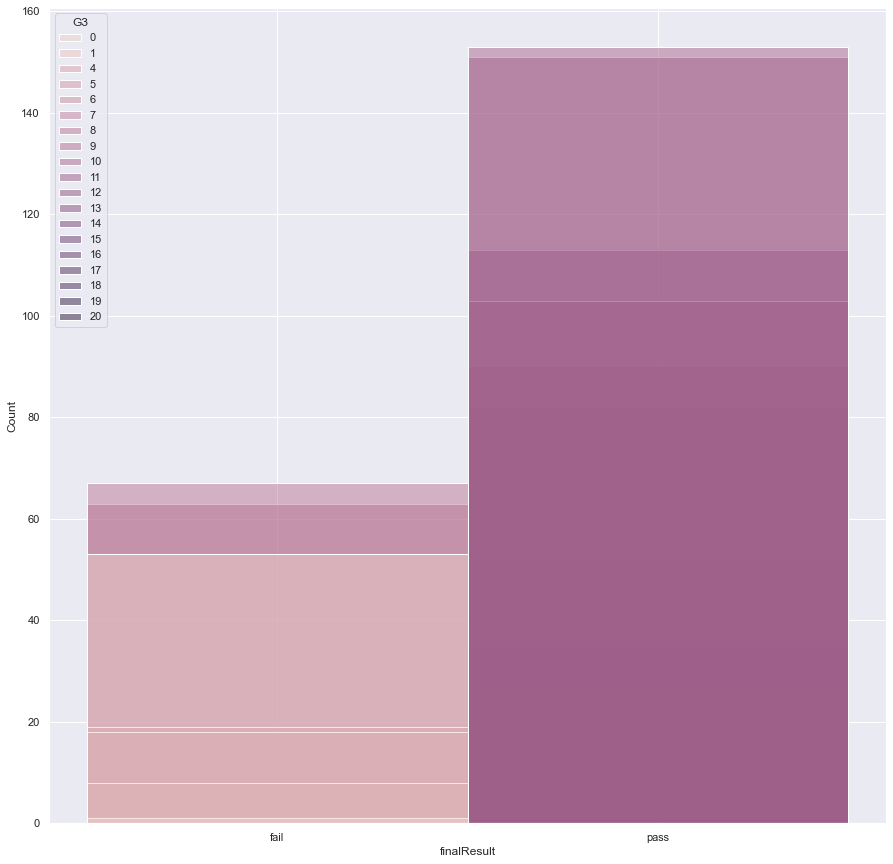

In [81]:
sns.histplot(data=df5, x='finalResult', hue="G3")

<AxesSubplot:xlabel='academicGrade', ylabel='Count'>

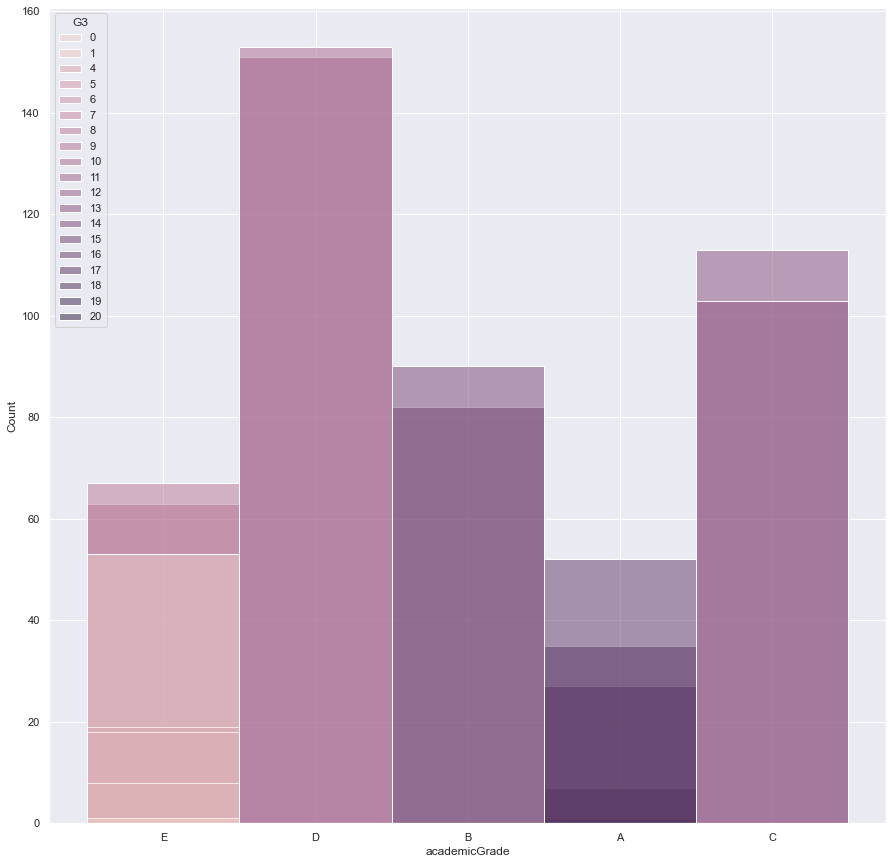

In [82]:
sns.histplot(data=df5, x='academicGrade', hue="G3")

# -comparer la note finale G3 avec le sex

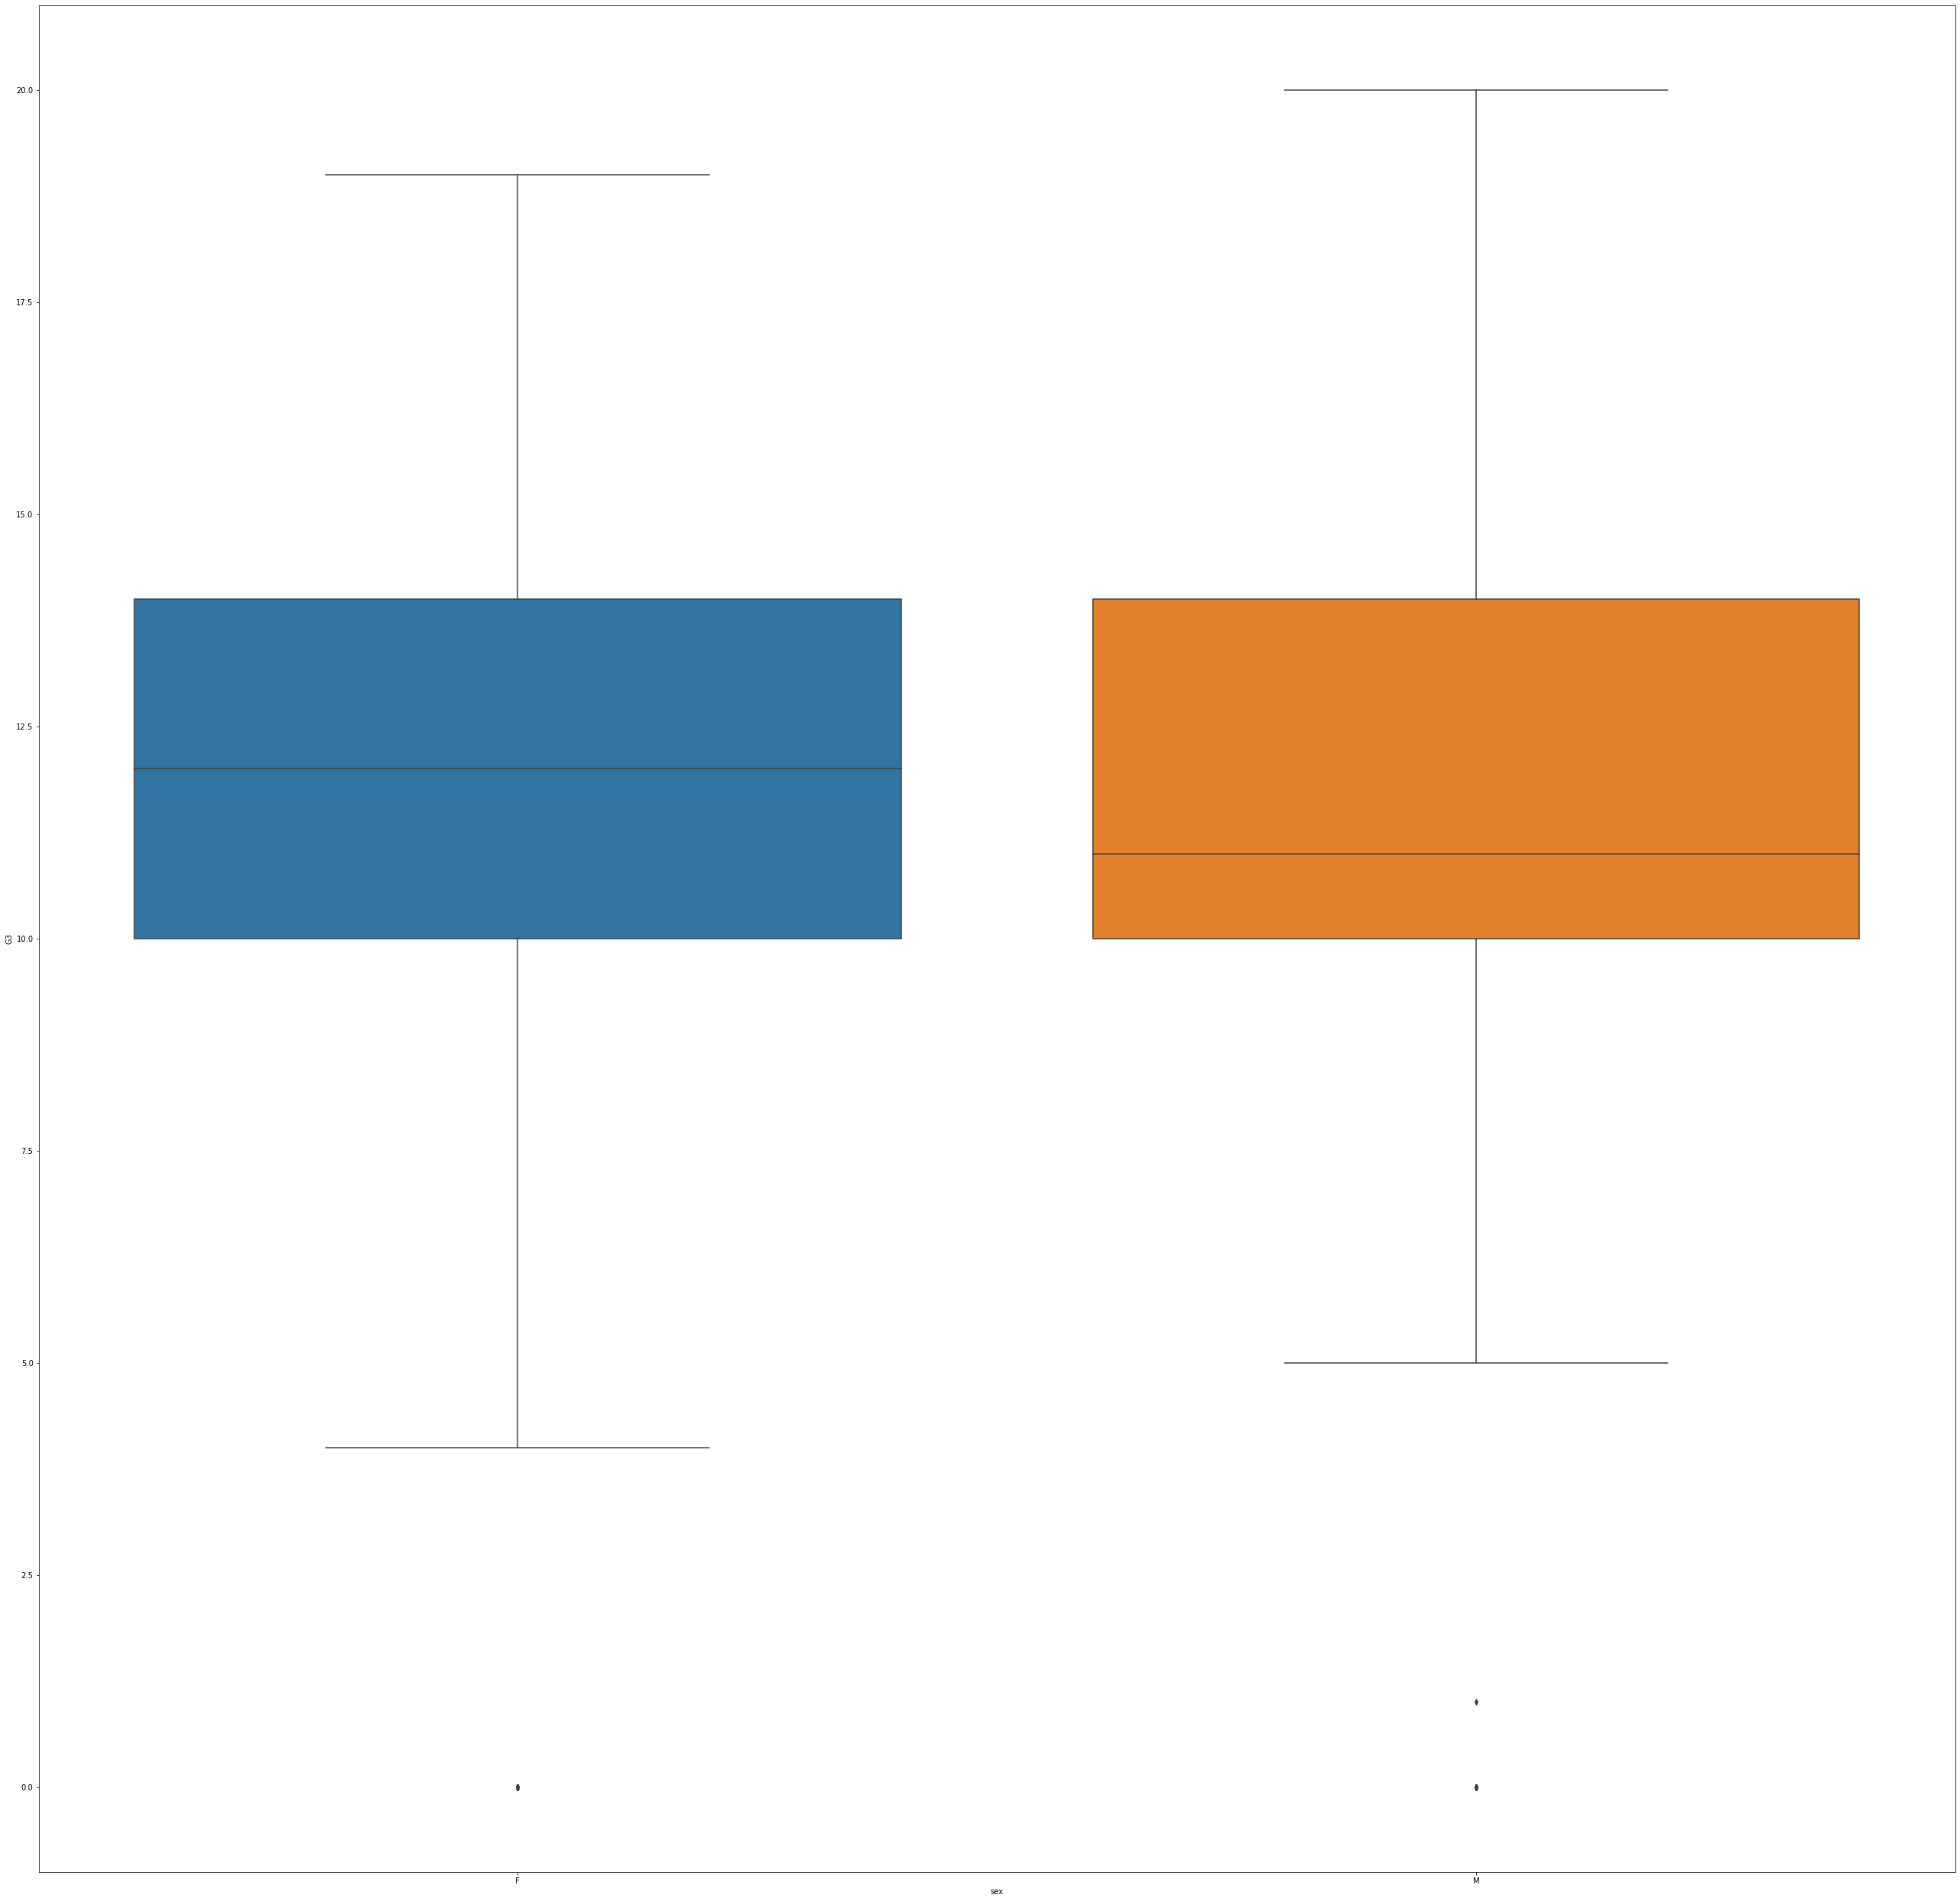

In [280]:

sns.boxplot(x="sex", y="G3", data=df5)
school_counts=df5["sex"].value_counts()

stu=df5.drop(["sex"],axis=1)

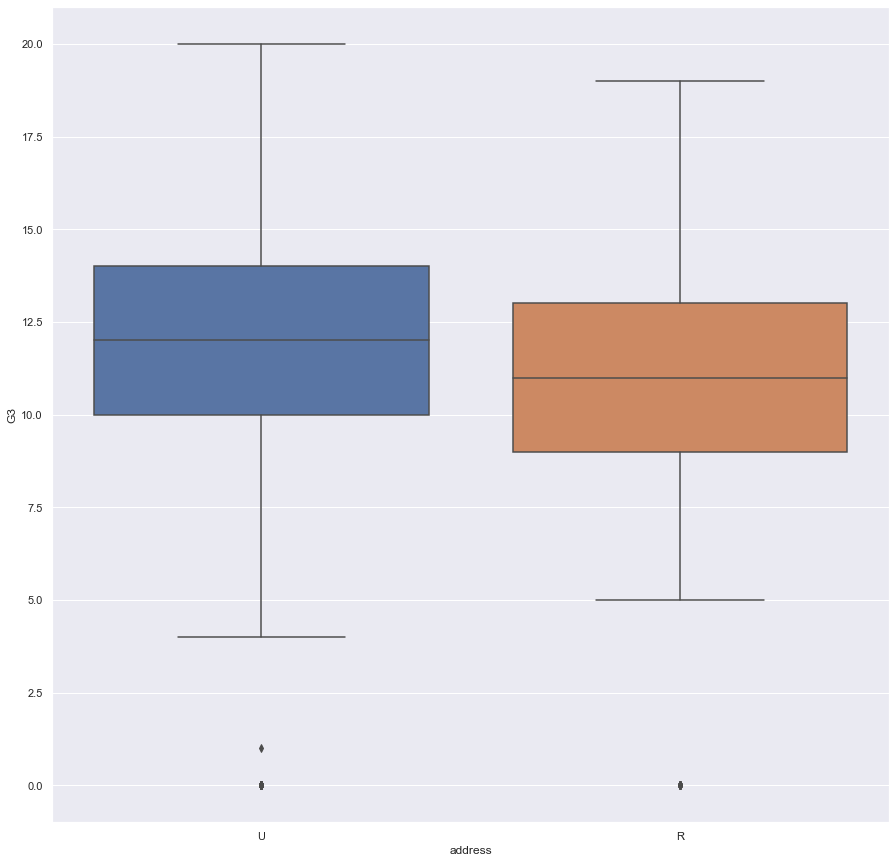

In [96]:
#comparing address with grades
sns.boxplot(x="address", y="G3", data=df5)
index=["A","B","C","D","E"]
addresstab1=pd.crosstab(columns=df5.address,index=df5.academicGrade)




In [99]:
df5.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'finalResult', 'academicGrade'],
      dtype='object')

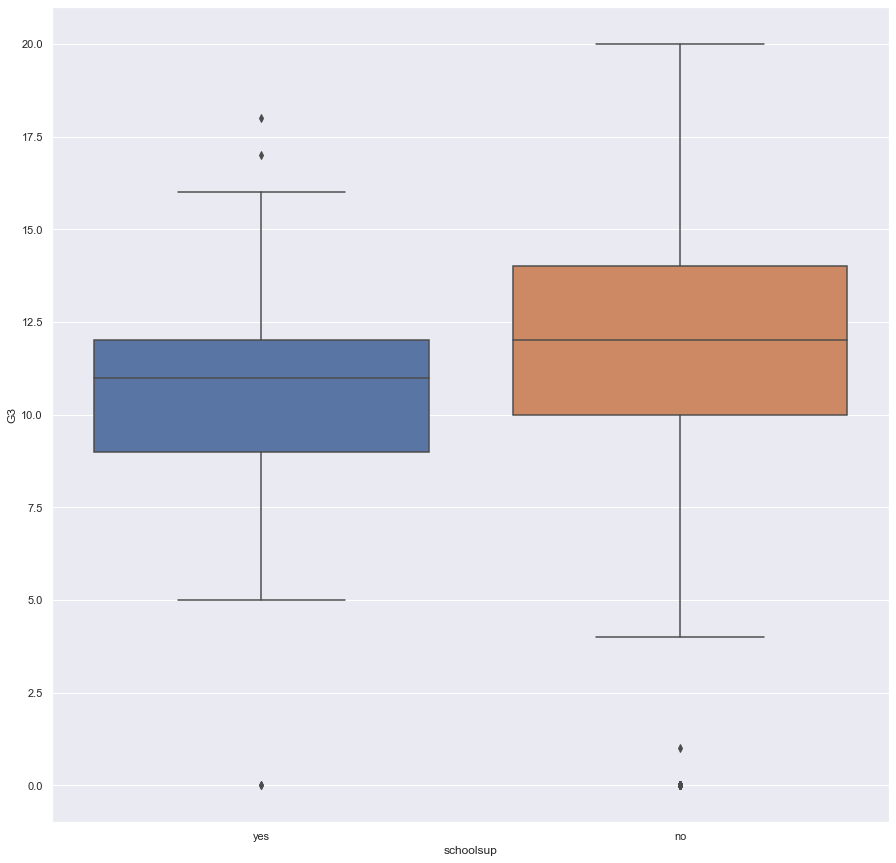

In [100]:
sns.boxplot(x="schoolsup", y="G3", data=df5)
index=["A","B","C","D","E"]
addresstab1=pd.crosstab(columns=df5.address,index=df5.academicGrade)

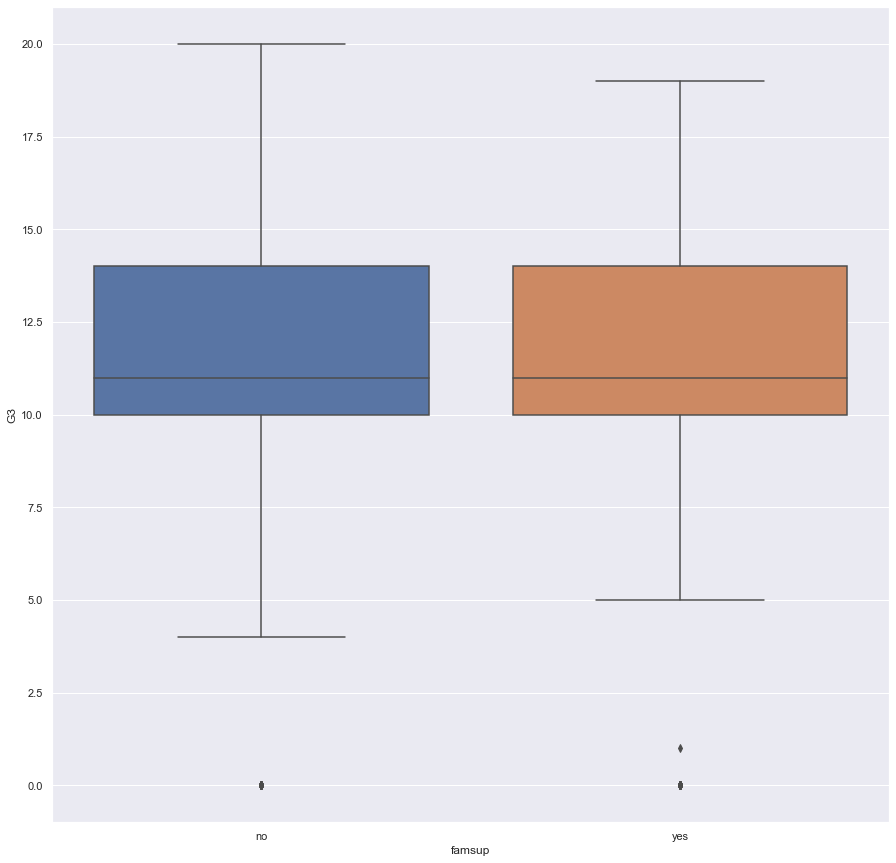

In [101]:
sns.boxplot(x="famsup", y="G3", data=df5)
index=["A","B","C","D","E"]
addresstab1=pd.crosstab(columns=df5.address,index=df5.academicGrade)

c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

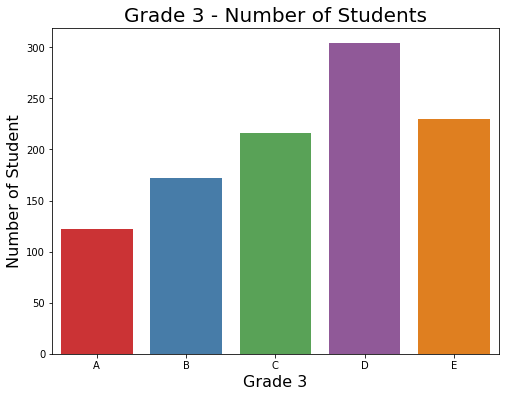

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df5["academicGrade"], order=["A","B","C","D","E"], palette='Set1')
plt.title('Grade 3 - Number of Students',fontsize=20)
plt.xlabel('Grade 3', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [291]:
grade_df = pd.DataFrame({
    'G3_mat' : df1['G3'].value_counts(),
    'G3_por' : df2['G3'].value_counts()
}).fillna(0)


Text(0, 0.5, 'count')

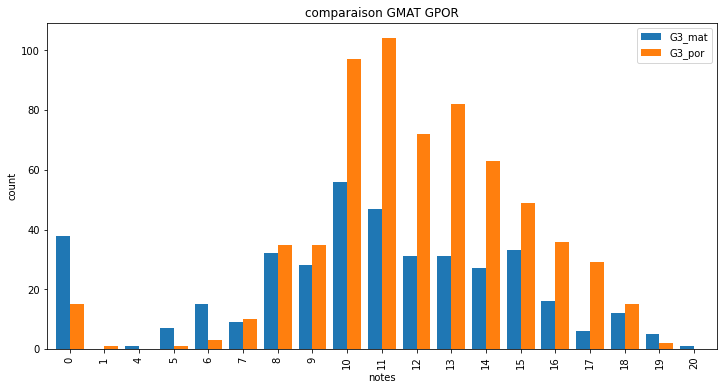

In [290]:


grade_df.plot(
     y=["G3_mat", "G3_por"], kind="bar", width=0.8, figsize=(12, 6)
)
plt.title("comparaison GMAT GPOR")
plt.xlabel("notes")
plt.ylabel("count")

# 5. Classification binaire sur la variable "finalResult" : 

# # DEFINIR NOS FEATURES X (input) ET LABELS y (output)

In [21]:

X=df5.drop(columns=["finalResult","academicGrade"])  #FEATURES 32

y = df5["finalResult"]   #TARGET


In [22]:
X.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


In [23]:
df5["studytime"].value_counts()

2    503
1    317
3    162
4     62
Name: studytime, dtype: int64

# 5. 1. Sklearn : Pre-processing

# -Encodage

In [24]:
X.shape

(1044, 32)

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, GP to MS
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            1044 non-null   object
 1   age            1044 non-null   int64 
 2   address        1044 non-null   object
 3   famsize        1044 non-null   object
 4   Pstatus        1044 non-null   object
 5   Medu           1044 non-null   int64 
 6   Fedu           1044 non-null   int64 
 7   Mjob           1044 non-null   object
 8   Fjob           1044 non-null   object
 9   reason         1044 non-null   object
 10  guardian       1044 non-null   object
 11  traveltime     1044 non-null   int64 
 12  studytime      1044 non-null   int64 
 13  failures       1044 non-null   int64 
 14  schoolsup      1044 non-null   object
 15  famsup         1044 non-null   object
 16  paid           1044 non-null   object
 17  activities     1044 non-null   object
 18  nursery        1044 non-null   obj

In [25]:
categorical_cols=["sex",'address', 'famsize', 'Pstatus','Mjob',
       'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic'  ]
X = pd.get_dummies(X, columns=categorical_cols)                                


In [110]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
school,,,,,,,,,,,,,,,,,,,,,
GP,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
GP,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
GP,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
GP,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
GP,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


# - Normalisation avec RobustScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

numerical_cols=["age",'Medu', 'Fedu','traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


X[numerical_cols]= scaler.fit_transform(X[numerical_cols])

X[numerical_cols] = pd.DataFrame(X, columns=numerical_cols)

In [54]:
X.shape

(1044, 32)

In [168]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
school,,,,,,,,,,,,,,,,,,,,,
GP,0.5,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,...,1,0,0,1,0,1,1,0,1,0
GP,0.0,-1.0,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,1,1,0
GP,-1.0,-1.0,-0.5,0.0,0.0,3.0,0.0,0.0,-0.5,1.0,...,1,0,0,1,0,1,0,1,1,0
GP,-1.0,0.5,0.0,0.0,1.0,0.0,-1.0,-1.0,-0.5,0.0,...,0,1,0,1,0,1,0,1,0,1
GP,-0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,...,1,0,0,1,0,1,1,0,1,0


In [164]:
X.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


# Split X and y

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)
print("dfshape",df5.shape)
print("X",X.shape, X_train.shape, X_test.shape)
print("y",y.shape, y_train.shape, y_test.shape)


dfshape (1044, 34)
X (1044, 57) (939, 57) (105, 57)
y (1044,) (939,) (105,)


In [28]:
X_test.shape

(105, 57)

##      *                                  Machine Learning Model *


# 5.2 le classificateur k-NN 

In [129]:
 #fitting the knn_calssifier to the training set
# =============================================================================
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_knn= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_knn=classification_report(y_test,y_pred_knn)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')
 
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_knn})
y_verif.head(5)

Train set accuracy: 0.96
Test set accuracy: 0.94




,Expected,Predicted
school,,
GP,pass,pass
GP,pass,pass
GP,fail,fail
GP,pass,pass
GP,fail,fail


In [80]:
print(report_knn)


              precision    recall  f1-score   support

        fail       0.89      0.61      0.72        28
        pass       0.87      0.97      0.92        77

    accuracy                           0.88       105
   macro avg       0.88      0.79      0.82       105
weighted avg       0.88      0.88      0.87       105



# 5.3. le classifieur Support Vector Machine. 

In [165]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_SVC= classifier.predict(X_test)
cm_SVC=confusion_matrix(y_test,y_pred_SVC)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_SVC=classification_report(y_test,y_pred_SVC)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')

#y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
#y_verif.head(5)
print(report_SVC)

Train set accuracy: 0.96
Test set accuracy: 0.94


              precision    recall  f1-score   support

        fail       0.96      0.82      0.88        28
        pass       0.94      0.99      0.96        77

    accuracy                           0.94       105
   macro avg       0.95      0.90      0.92       105
weighted avg       0.94      0.94      0.94       105



# 5.4.  le classificateur d'analyse discriminante linéaire

In [163]:
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier=LinearDiscriminantAnalysis()
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_discrim= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_discrim= confusion_matrix(y_test, y_pred_discrim)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_discrim=classification_report(y_test,y_pred_discrim)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')

#y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
#y_verif.head(5)
print(report_discrim)

Train set accuracy: 0.94
Test set accuracy: 0.89


              precision    recall  f1-score   support

        fail       1.00      0.57      0.73        28
        pass       0.87      1.00      0.93        77

    accuracy                           0.89       105
   macro avg       0.93      0.79      0.83       105
weighted avg       0.90      0.89      0.87       105



# 5.5. Même question avec le classificateur de régression logistique. 

In [116]:
# #fitting logistic regression to the training set
# =============================================================================
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_logistic= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logistic= confusion_matrix(y_test, y_pred_logistic)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_logistic=classification_report(y_test,y_pred_logistic)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(5)

print(report_logistic)

Train set accuracy: 0.99
Test set accuracy: 0.99


              precision    recall  f1-score   support

        fail       1.00      0.96      0.98        28
        pass       0.99      1.00      0.99        77

    accuracy                           0.99       105
   macro avg       0.99      0.98      0.99       105
weighted avg       0.99      0.99      0.99       105



In [ ]:
6.le classificateur d'arbre de décision. Dessinez l'arbre résultant. 

Train set accuracy: 0.99
Test set accuracy: 0.99


DecisionTreeClassifier()


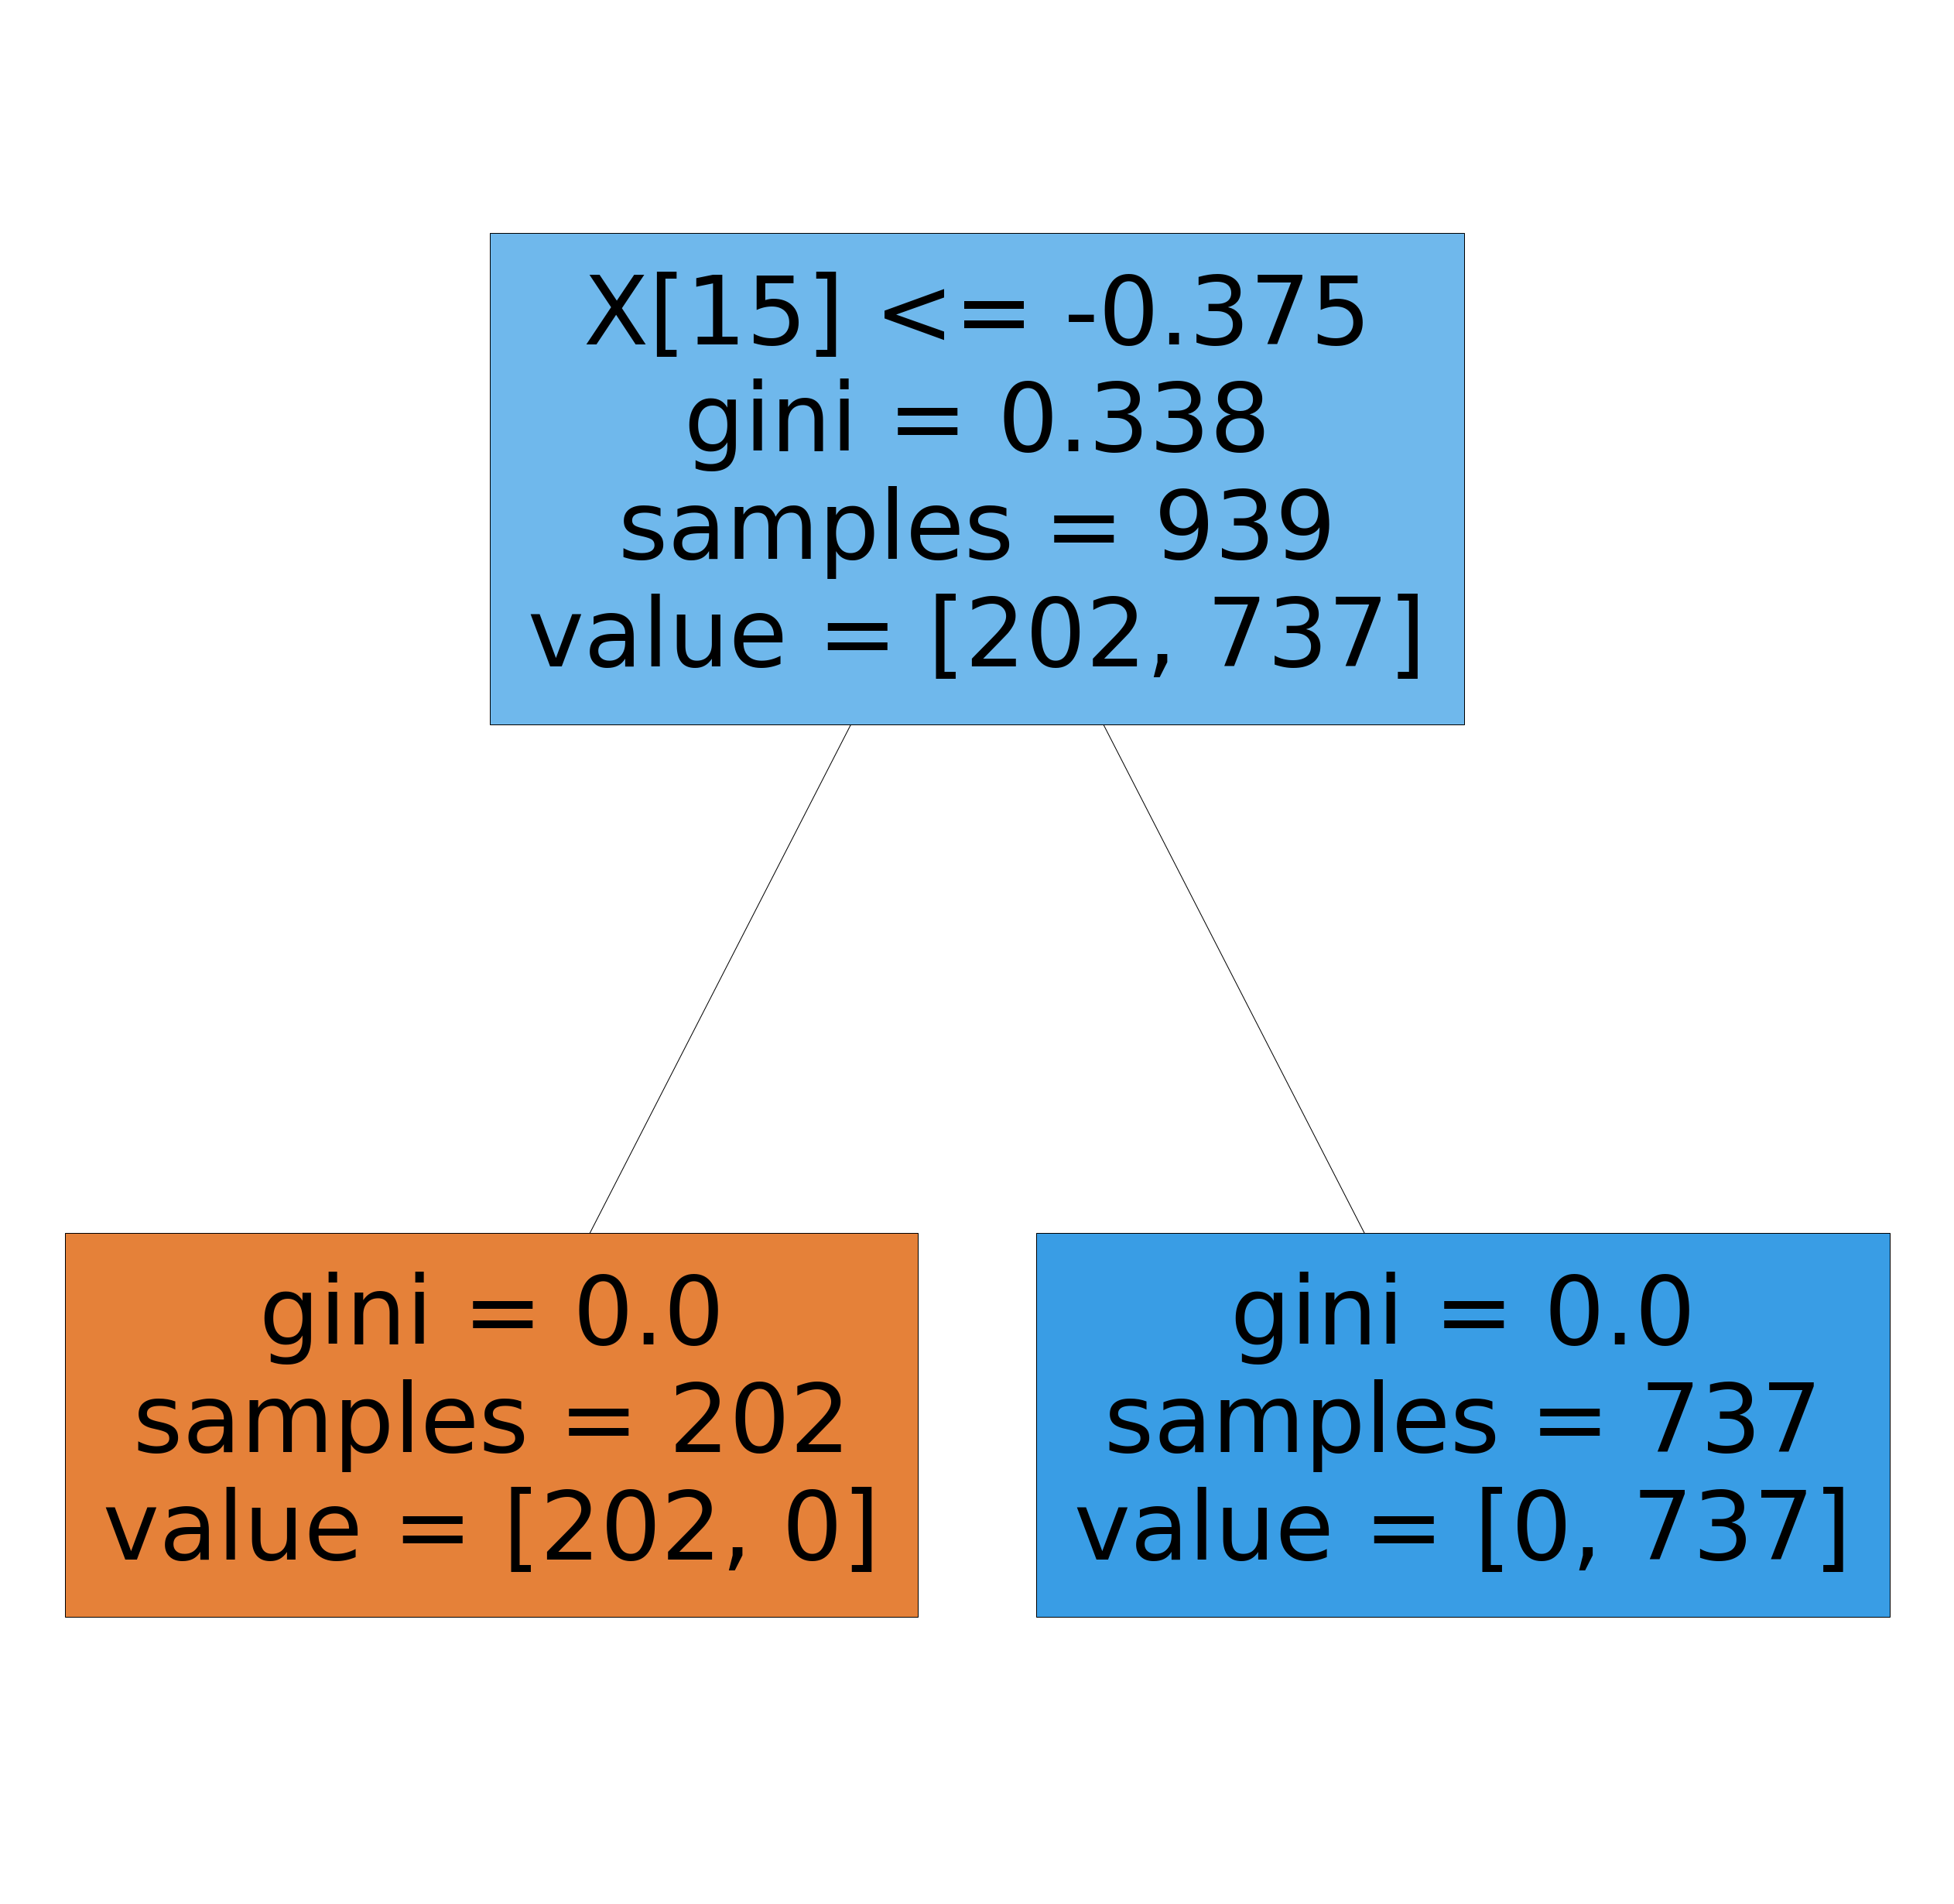

In [121]:
from sklearn import tree
plt.rcParams['figure.figsize'] = 48, 48


# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#from matplotlib import rcParams
#rcParams['figure.figsize'] =50, 50

from matplotlib import rcParams

rcParams['figure.figsize'] = 45, 45
#PLOT TREE
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
tree.plot_tree(clf,filled=True) ;

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(5)

print(clf)

# 5.7 VotingClassifier.

In [133]:


#pip install PrettyTable
from prettytable import PrettyTable

#importer nos modeles
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#importer les metrics pour le calcul des scores
from sklearn.metrics import accuracy_score


import time
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.10, random_state=100)


from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model","acc_train","acc_test","overfit","tempsCPU","FPR","FNR"]
models = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
  
    LinearDiscriminantAnalysis(),
    LogisticRegression()
   
]
for model in models:
    t0=time.time()

    model.fit(XTrain, YTrain) 
    t1=time.time()
    accuracy_train=model.score(XTrain, YTrain)
    accuracy_test= model.score(XTest, YTest)
    tempsCPU=(t1-t0)*100
    
    prediction = model.predict(XTest)
    confusion = confusion_matrix(YTest, prediction)
    FALSE_POSITIVE_RATE = round(confusion[0][1]/y_test.shape[0]*100,2)
    FALSE_NEGATIVE_RATE = round(confusion[1][0]/y_test.shape[0]*100,2)
    overfitting=(accuracy_train-accuracy_test)/accuracy_train*100
    table.add_row([type(model).__name__,  format(accuracy_train, '.2f'), format(accuracy_test, '.2f'),
                   format(overfitting, '.1f'),format(tempsCPU, '.1f'),
                  FALSE_POSITIVE_RATE,FALSE_NEGATIVE_RATE])
    #equite
#http://zetcode.com/python/prettytable/
print (table.get_string(sortby="FPR"))

+----------------------------+-----------+----------+---------+----------+-------+------+
|           Model            | acc_train | acc_test | overfit | tempsCPU |  FPR  | FNR  |
+----------------------------+-----------+----------+---------+----------+-------+------+
|   DecisionTreeClassifier   |    1.00   |   1.00   |   0.0   |   0.4    |  0.0  | 0.0  |
|     LogisticRegression     |    0.99   |   0.99   |   0.2   |   3.8    |  0.95 | 0.0  |
|            SVC             |    0.98   |   0.93   |   4.7   |   3.7    |  5.71 | 0.95 |
|    KNeighborsClassifier    |    0.91   |   0.88   |   4.1   |   0.5    | 10.48 | 1.9  |
| LinearDiscriminantAnalysis |    0.94   |   0.89   |   5.5   |   2.4    | 11.43 | 0.0  |
+----------------------------+-----------+----------+---------+----------+-------+------+


In [ ]:
#voting

In [126]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


model_1 = KNeighborsClassifier(n_neighbors=2)
model_2 =     SVC()
model_3=LinearDiscriminantAnalysis()
model_4=LogisticRegression()
model_5 = DecisionTreeClassifier(random_state=0)
model_6= VotingClassifier([('ikram', model_1),
                            ('dioum', model_2),('bouchikh', model_3),('amadou', model_4),('bayal', model_5)
                        ],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4, model_5, model_6):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_train, y_train),model.score(X_test, y_test))




KNeighborsClassifier 0.9030883919062833 0.8095238095238095
SVC 0.979765708200213 0.9333333333333333
LinearDiscriminantAnalysis 0.9371671991480298 0.8857142857142857
LogisticRegression 0.9925452609158679 0.9904761904761905
DecisionTreeClassifier 1.0 1.0
VotingClassifier 0.9936102236421726 0.9714285714285714


# 8-le classificateur Random Forest

In [243]:
# =============================================================================
# #random forest
# =============================================================================
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

#predicting the test set re4sults
y_pred_random=classifier.predict(X_test)

importances=classifier.feature_importances_
for i,features in zip(importances,['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']):
    print("{}:{}".format(features,i))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
#names = [train_stu2.columns[i] for i in indices]

# Barplot: Add bars

#plt.figure(figsize=(20,20))
#plt.bar(range(train_x.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
#plt.xticks(range(train_x.shape[1]),names, rotation=60, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

# Create plot title
#plt.title("Feature Importance")
# Show plot
#plt.show()

#determinnig the confusion matrix
from sklearn.metrics import confusion_matrix
cm_random=confusion_matrix(y_test,y_pred_random)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_random=classification_report(y_test,y_pred_random)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(5)

print(report_random)


age:0.020419736965343983
Medu:0.015157881511303397
Fedu:0.01752720650314701
traveltime:0.009744049068720824
studytime:0.01217583226755209
failures:0.017488546025328594
famrel:0.013711765924022935
freetime:0.017938038092123968
goout:0.01667428184495215
Dalc:0.010784122372720412
Walc:0.01571591048153004
health:0.017478296430723027
absences:0.040320339839226074
G1:0.09307985135391018
G2:0.18992793350596443
G3:0.49185620781343076
Train set accuracy: 1.00
Test set accuracy: 0.94


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.80      0.89      0.84         9
           9       0.91      0.91      0.91        11
          10       1.00      1.00      1.00        17
          11       1.00      1.0

c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

# 9. Même question avec le classificateur Gradient Boosting. 

In [130]:
#biblioteques
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  #score

#choisir le modele
model = GradientBoostingClassifier() 

#entrainer le modele
model.fit(X_train, y_train)

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(model.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(model.score(X_test, y_test)))
print('\n')

#Make prediction
prediction = model.predict(X_test)

#la matrice de confusion
confusion = confusion_matrix(y_test, prediction)

print('Confusion matrix:\n')
print(confusion)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(5)

Train set accuracy: 1.00
Test set accuracy: 1.00


Confusion matrix:

[[28  0]
 [ 0 77]]


,Expected,Predicted
school,,
GP,pass,pass
GP,pass,pass
GP,fail,fail
GP,pass,pass
GP,fail,fail


In [ ]:
10.  le classificateur AdaBoost. 

In [131]:
#biblioteques
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  #score

#choisir le modele
model = AdaBoostClassifier() 

#entrainer le modele
model.fit(X_train, y_train)

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(model.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(model.score(X_test, y_test)))
print('\n')

#Make prediction
prediction = model.predict(X_test)

#la matrice de confusion
confusion = confusion_matrix(y_test, prediction)

print('Confusion matrix:\n')
print(confusion)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
y_verif.head(5)

Train set accuracy: 1.00
Test set accuracy: 1.00


Confusion matrix:

[[28  0]
 [ 0 77]]


,Expected,Predicted
school,,
GP,pass,pass
GP,pass,pass
GP,fail,fail
GP,pass,pass
GP,fail,fail


# 11. Comparer les performances des algorithmes précédents.

In [132]:
#tableaux de stockage des resulats

#pip install PrettyTable
from prettytable import PrettyTable

#importer nos modeles
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#importer les metrics pour le calcul des scores
from sklearn.metrics import accuracy_score


import time
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.10, random_state=100)


from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model","acc_train","acc_test","overfit","tempsCPU","FPR","FNR"]
models = [
    
    RandomForestClassifier(),
    AdaBoostClassifier(), 
    GradientBoostingClassifier() 
]
for model in models:
    t0=time.time()

    model.fit(XTrain, YTrain) 
    t1=time.time()
    accuracy_train=model.score(XTrain, YTrain)
    accuracy_test= model.score(XTest, YTest)
    tempsCPU=(t1-t0)*100
    
    prediction = model.predict(XTest)
    confusion = confusion_matrix(YTest, prediction)
    FALSE_POSITIVE_RATE = round(confusion[0][1]/y_test.shape[0]*100,2)
    FALSE_NEGATIVE_RATE = round(confusion[1][0]/y_test.shape[0]*100,2)
    overfitting=(accuracy_train-accuracy_test)/accuracy_train*100
    table.add_row([type(model).__name__,  format(accuracy_train, '.2f'), format(accuracy_test, '.2f'),
                   format(overfitting, '.1f'),format(tempsCPU, '.1f'),
                  FALSE_POSITIVE_RATE,FALSE_NEGATIVE_RATE])
    #equite
#http://zetcode.com/python/prettytable/
print (table.get_string(sortby="FPR"))

+----------------------------+-----------+----------+---------+----------+-----+-----+
|           Model            | acc_train | acc_test | overfit | tempsCPU | FPR | FNR |
+----------------------------+-----------+----------+---------+----------+-----+-----+
|     AdaBoostClassifier     |    1.00   |   1.00   |   0.0   |   0.5    | 0.0 | 0.0 |
| GradientBoostingClassifier |    1.00   |   1.00   |   0.0   |   26.6   | 0.0 | 0.0 |
|   RandomForestClassifier   |    1.00   |   1.00   |   0.0   |   26.8   | 0.0 | 0.0 |
+----------------------------+-----------+----------+---------+----------+-----+-----+


# 6. Classification multivariée sur la variable "academicGrade"  

In [ ]:
# 2.k-NN classifier

In [32]:
#X=df5.drop(columns=["finalResult","academicGrade"])  #FEATURES 32


y1 = df5["academicGrade"]   #TARGET

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.10, random_state=100)
print("dfshape",df5.shape)
print("X",X.shape, X_train.shape, X_test.shape)
print("y",y1.shape, y1_train.shape, y1_test.shape)

dfshape (1044, 34)
X (1044, 57) (939, 57) (105, 57)
y (1044,) (939,) (105,)


In [35]:
#fitting the knn_calssifier to the training set
# =============================================================================
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y1_train)
# Predicting the Test set results
y1_pred_knn= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knnn= confusion_matrix(y1_test, y1_pred_knn)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_knnn=classification_report(y1_test,y1_pred_knn)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

y1_verif= pd.DataFrame({'Expected':y1_test, 'Predicted':y1_pred_knn})
y1_verif.head(5)

Train set accuracy: 0.70
Test set accuracy: 0.58




,Expected,Predicted
school,,
GP,C,C
GP,B,B
GP,E,D
GP,D,D
GP,E,E


In [318]:
print(report_knnn)

              precision    recall  f1-score   support

           A       0.93      0.93      0.93        14
           B       0.86      0.67      0.75        18
           C       0.62      0.77      0.69        13
           D       0.81      0.94      0.87        32
           E       0.96      0.82      0.88        28

    accuracy                           0.84       105
   macro avg       0.84      0.82      0.82       105
weighted avg       0.85      0.84      0.84       105



In [ ]:
# 3.Support Vector Machine classifier

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y1_train)
# Predicting the Test set results
y1_pred_SVC= classifier.predict(X_test)
cm_SVCC=confusion_matrix(y1_test,y1_pred_SVC)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_SVCC=classification_report(y1_test,y1_pred_SVC)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

#y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
#y_verif.head(5)
print(report_SVCC)

Train set accuracy: 0.93
Test set accuracy: 0.83


              precision    recall  f1-score   support

           A       1.00      0.93      0.96        14
           B       0.88      0.78      0.82        18
           C       0.62      0.62      0.62        13
           D       0.75      0.94      0.83        32
           E       0.96      0.79      0.86        28

    accuracy                           0.83       105
   macro avg       0.84      0.81      0.82       105
weighted avg       0.84      0.83      0.83       105



In [ ]:
# 4.Analyse discriminante linéaire

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier=LinearDiscriminantAnalysis()
classifier.fit(X_train,y1_train)
# Predicting the Test set results
y1_pred_discrim= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_discrimm= confusion_matrix(y1_test, y1_pred_discrim)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_discrimm=classification_report(y1_test,y1_pred_discrim)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

y1_verif= pd.DataFrame({'Expected':y1_test, 'Predicted':y1_pred_discrim})
y1_verif.head(5)
print(report_discrimm)

Train set accuracy: 0.81
Test set accuracy: 0.80


              precision    recall  f1-score   support

           A       1.00      0.93      0.96        14
           B       0.81      0.72      0.76        18
           C       0.60      0.69      0.64        13
           D       0.72      0.97      0.83        32
           E       1.00      0.64      0.78        28

    accuracy                           0.80       105
   macro avg       0.83      0.79      0.80       105
weighted avg       0.83      0.80      0.80       105



In [ ]:
# 5.Classificateur de Regression Logistique

In [38]:
# #fitting logistic regression to the training set
# =============================================================================
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y1_train)
# Predicting the Test set results
y1_pred_logistic= classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logisticc= confusion_matrix(y1_test, y1_pred_logistic)  #print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_logistic=classification_report(y1_test,y1_pred_logistic)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

y1_verif= pd.DataFrame({'Expected':y_test, 'Predicted':y1_pred_logistic})
y1_verif.head(5)

print(report_logistic)

Train set accuracy: 0.95
Test set accuracy: 0.94


              precision    recall  f1-score   support

           A       0.93      0.93      0.93        14
           B       0.89      0.89      0.89        18
           C       0.92      0.85      0.88        13
           D       0.94      1.00      0.97        32
           E       1.00      0.96      0.98        28

    accuracy                           0.94       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.94      0.94       105



c:\users\ikram\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 6.Classificateur d'Arbre de Décision

Train set accuracy: 0.95
Test set accuracy: 0.94


DecisionTreeClassifier()


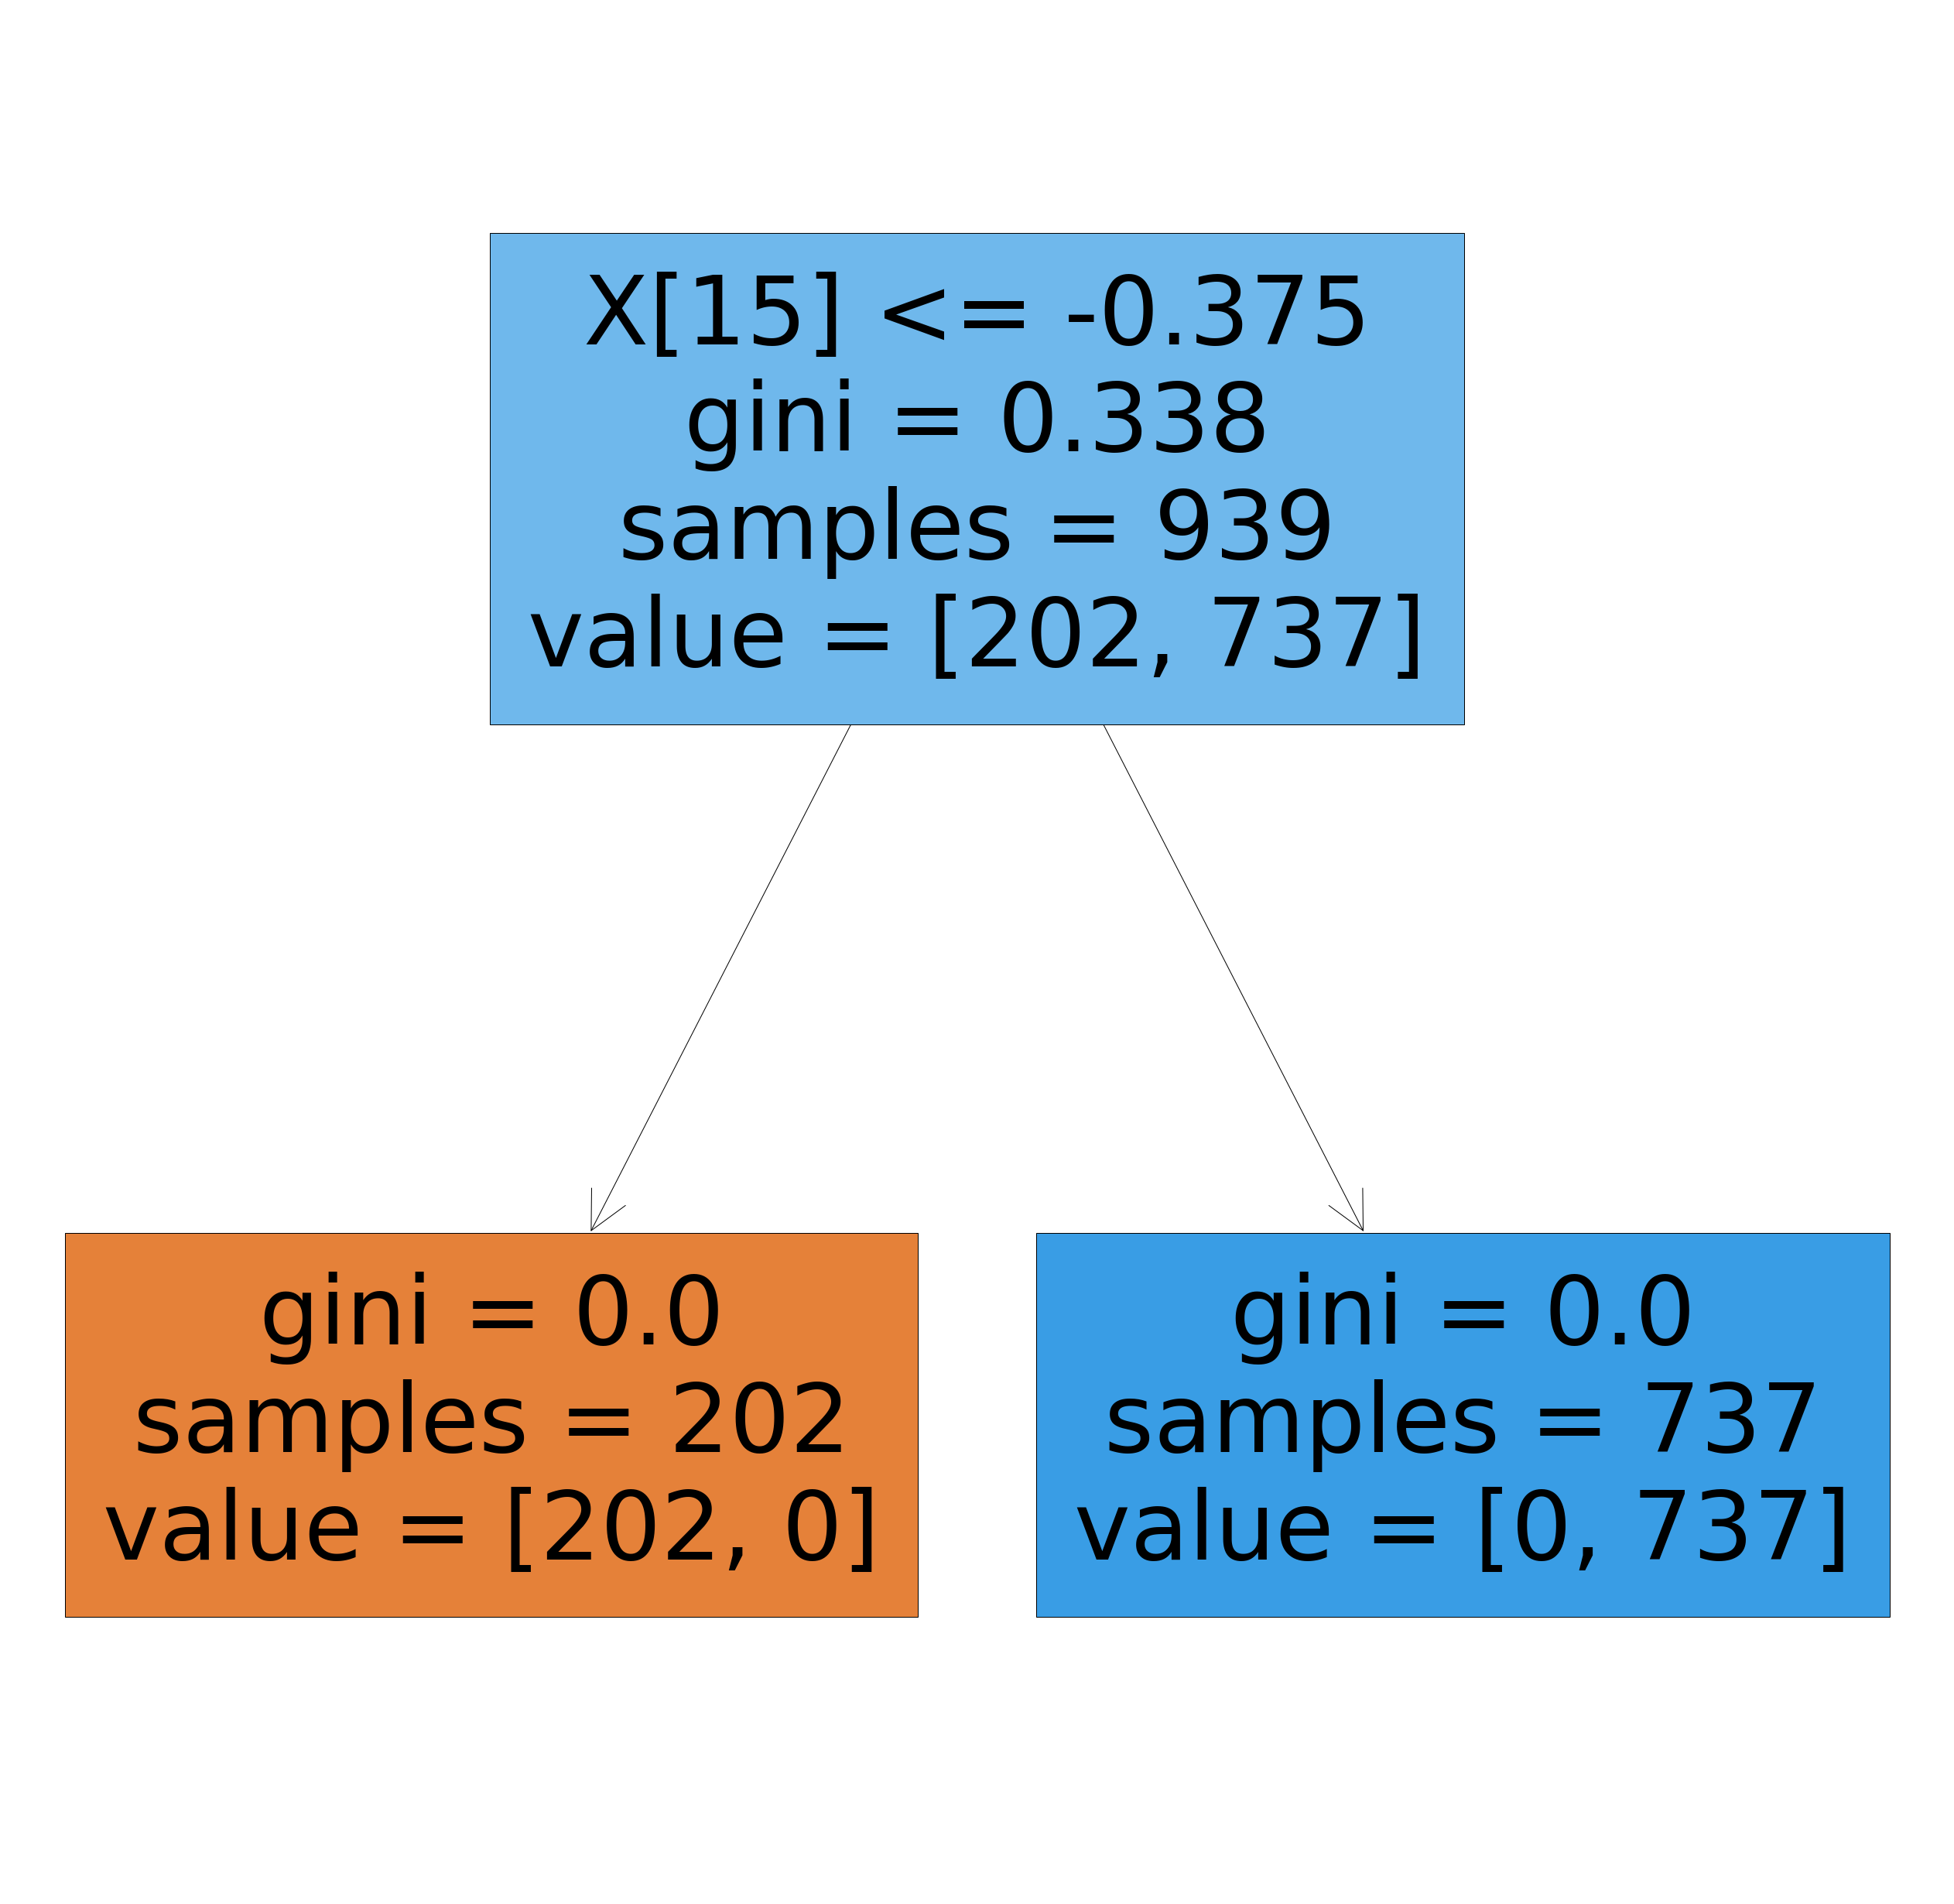

In [41]:
from sklearn import tree
plt.rcParams['figure.figsize'] = 48, 48


# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#from matplotlib import rcParams
#rcParams['figure.figsize'] =50, 50

from matplotlib import rcParams

rcParams['figure.figsize'] = 45, 45
#PLOT TREE
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
tree.plot_tree(clf,filled=True) ;

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':clf})
y_verif.head(5)

print(clf)

In [ ]:
# 7.Voting Classifier.

In [323]:
#pip install PrettyTable
from prettytable import PrettyTable

#importer nos modeles
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#importer les metrics pour le calcul des scores
from sklearn.metrics import accuracy_score


import time
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, y1, test_size=0.10, random_state=100)


from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model","acc_train","acc_test","overfit","tempsCPU","FPR","FNR"]
models = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
  
    LinearDiscriminantAnalysis(),
    LogisticRegression()
   
]
for model in models:
    t0=time.time()

    model.fit(XTrain, YTrain) 
    t1=time.time()
    accuracy_train=model.score(XTrain, YTrain)
    accuracy_test= model.score(XTest, YTest)
    tempsCPU=(t1-t0)*100
    
    prediction = model.predict(XTest)
    confusion = confusion_matrix(YTest, prediction)
    FALSE_POSITIVE_RATE = round(confusion[0][1]/y_test.shape[0]*100,2)
    FALSE_NEGATIVE_RATE = round(confusion[1][0]/y_test.shape[0]*100,2)
    overfitting=(accuracy_train-accuracy_test)/accuracy_train*100
    table.add_row([type(model).__name__,  format(accuracy_train, '.2f'), format(accuracy_test, '.2f'),
                   format(overfitting, '.1f'),format(tempsCPU, '.1f'),
                  FALSE_POSITIVE_RATE,FALSE_NEGATIVE_RATE])
    #equite
#http://zetcode.com/python/prettytable/
print (table.get_string(sortby="FPR"))

+----------------------------+-----------+----------+---------+----------+------+------+
|           Model            | acc_train | acc_test | overfit | tempsCPU | FPR  | FNR  |
+----------------------------+-----------+----------+---------+----------+------+------+
|   DecisionTreeClassifier   |    1.00   |   1.00   |   0.0   |   0.3    | 0.0  | 0.0  |
|    KNeighborsClassifier    |    0.88   |   0.84   |   4.6   |   6.6    | 0.95 | 0.95 |
| LinearDiscriminantAnalysis |    0.79   |   0.81   |   -2.2  |   0.8    | 0.95 | 0.0  |
|            SVC             |    0.87   |   0.88   |   -0.2  |   5.6    | 0.95 | 0.0  |
|     LogisticRegression     |    0.80   |   0.79   |   1.4   |   10.9   | 1.9  | 2.86 |
+----------------------------+-----------+----------+---------+----------+------+------+


c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# voting

In [326]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


model_1 = KNeighborsClassifier(n_neighbors=2)
model_2 =     SVC()
model_3=LinearDiscriminantAnalysis()
model_4=LogisticRegression()
model_5 = DecisionTreeClassifier(random_state=0)
model_6= VotingClassifier([('ikram', model_1),
                            ('dioum', model_2),('bouchikh', model_3),('amadou', model_4),('bayal', model_5)
                        ],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4, model_5, model_6):
    model.fit(X_train, y1_train)
    print(model.__class__.__name__, model.score(X_train, y1_train),model.score(X_test, y1_test))


KNeighborsClassifier 0.8572949946751863 0.7142857142857143
SVC 0.8743343982960596 0.8761904761904762
LinearDiscriminantAnalysis 0.792332268370607 0.8095238095238095


c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\t2n\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

LogisticRegression 0.8019169329073482 0.7904761904761904
DecisionTreeClassifier 1.0 1.0
VotingClassifier 0.9371671991480298 0.8952380952380953


In [ ]:
8. Le classificateur Random Forest¶

In [327]:
# =============================================================================
# #random forest
# =============================================================================
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
classifier.fit(X_train,y1_train)

#predicting the test set re4sults
y1_pred_random=classifier.predict(X_test)

importances=classifier.feature_importances_
for i,features in zip(importances,['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']):
    print("{}:{}".format(features,i))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
#names = [train_stu2.columns[i] for i in indices]

# Barplot: Add bars

#plt.figure(figsize=(20,20))
#plt.bar(range(train_x.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
#plt.xticks(range(train_x.shape[1]),names, rotation=60, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

# Create plot title
#plt.title("Feature Importance")
# Show plot
#plt.show()

#determinnig the confusion matrix
from sklearn.metrics import confusion_matrix
cm_random=confusion_matrix(y1_test,y1_pred_random)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_random=classification_report(y1_test,y1_pred_random)
#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(classifier.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y1_test)))
print('\n')

y_verif= pd.DataFrame({'Expected':y1_test, 'Predicted':prediction})
y_verif.head(5)

print(report_random)

age:0.009236939213166605
Medu:0.010268963278376791
Fedu:0.007718938757036861
traveltime:0.0054119923367283804
studytime:0.005418462363742054
failures:0.01418786016238022
famrel:0.006697144677956693
freetime:0.007537201526001705
goout:0.009258375631379618
Dalc:0.006808413420131898
Walc:0.008047954685776616
health:0.0076232161420756546
absences:0.013881951807352083
G1:0.10647722876671842
G2:0.22865812785496056
G3:0.552767229376216
Train set accuracy: 1.00
Test set accuracy: 1.00


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        14
           B       1.00      1.00      1.00        18
           C       1.00      1.00      1.00        13
           D       1.00      1.00      1.00        32
           E       1.00      1.00      1.00        28

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [ ]:
# 9. Same question with the Gradient Boosting classifier.

In [328]:
#biblioteques
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  #score

#choisir le modele
model = GradientBoostingClassifier() 

#entrainer le modele
model.fit(X_train, y1_train)

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(model.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(model.score(X_test, y1_test)))
print('\n')

#Make prediction
prediction = model.predict(X_test)

#la matrice de confusion
confusion = confusion_matrix(y1_test, prediction)

print('Confusion matrix:\n')
print(confusion)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y1_test, 'Predicted':prediction})
y_verif.head(5)

Train set accuracy: 1.00
Test set accuracy: 1.00


Confusion matrix:

[[14  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 28]]


,Expected,Predicted
school,,
GP,C,C
GP,B,B
GP,E,E
GP,D,D
GP,E,E


In [ ]:
10. Same question with the AdaBoost classifier.

In [329]:
#biblioteques
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  #score

#choisir le modele
model = AdaBoostClassifier() 

#entrainer le modele
model.fit(X_train, y1_train)

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(model.score(X_train, y1_train)))
print('Test set accuracy: {:.2f}'.format(model.score(X_test, y1_test)))
print('\n')

#Make prediction
prediction = model.predict(X_test)

#la matrice de confusion
confusion = confusion_matrix(y1_test, prediction)

print('Confusion matrix:\n')
print(confusion)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y1_test, 'Predicted':prediction})
y_verif.head(5)

Train set accuracy: 0.84
Test set accuracy: 0.83


Confusion matrix:

[[14  0  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 28]]


,Expected,Predicted
school,,
GP,C,C
GP,B,C
GP,E,E
GP,D,D
GP,E,E


In [ ]:
# 11. Compare the performances of the previous algorithms.

In [330]:
#tableaux de stockage des resulats

#pip install PrettyTable
from prettytable import PrettyTable

#importer nos modeles
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#importer les metrics pour le calcul des scores
from sklearn.metrics import accuracy_score


import time
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.10, random_state=100)


from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model","acc_train","acc_test","overfit","tempsCPU","FPR","FNR"]
models = [
    
    RandomForestClassifier(),
    AdaBoostClassifier(), 
    GradientBoostingClassifier() 
]
for model in models:
    t0=time.time()

    model.fit(XTrain, YTrain) 
    t1=time.time()
    accuracy_train=model.score(XTrain, YTrain)
    accuracy_test= model.score(XTest, YTest)
    tempsCPU=(t1-t0)*100
    
    prediction = model.predict(XTest)
    confusion = confusion_matrix(YTest, prediction)
    FALSE_POSITIVE_RATE = round(confusion[0][1]/y_test.shape[0]*100,2)
    FALSE_NEGATIVE_RATE = round(confusion[1][0]/y_test.shape[0]*100,2)
    overfitting=(accuracy_train-accuracy_test)/accuracy_train*100
    table.add_row([type(model).__name__,  format(accuracy_train, '.2f'), format(accuracy_test, '.2f'),
                   format(overfitting, '.1f'),format(tempsCPU, '.1f'),
                  FALSE_POSITIVE_RATE,FALSE_NEGATIVE_RATE])
    #equite
#http://zetcode.com/python/prettytable/
print (table.get_string(sortby="FPR"))

+----------------------------+-----------+----------+---------+----------+-----+-----+
|           Model            | acc_train | acc_test | overfit | tempsCPU | FPR | FNR |
+----------------------------+-----------+----------+---------+----------+-----+-----+
|     AdaBoostClassifier     |    0.59   |   0.61   |   -2.9  |   15.1   | 0.0 | 0.0 |
| GradientBoostingClassifier |    1.00   |   0.99   |   1.0   |  472.1   | 0.0 | 0.0 |
|   RandomForestClassifier   |    1.00   |   0.94   |   5.7   |   35.6   | 0.0 | 0.0 |
+----------------------------+-----------+----------+---------+----------+-----+-----+


# 7. Régression sur la variable "G3" : 

In [196]:
#Selecting features by analysing which features are collinear to `G3` and collinear 
# to the selected columns
features = ['failures','Medu','studytime','absences','G1','G2']
target = 'G3'

x_train, x_test, y_train, y_test = train_test_split(
    df5[features], df5[target], test_size=0.3, random_state=0
)

In [197]:
# Scaling the dataset

scaler = StandardScaler()

x_train = scaler.fit_transform(np.asanyarray(x_train))
y_train = np.asanyarray(y_train)

x_test = scaler.fit_transform(np.asanyarray(x_test))
y_test = np.asanyarray(y_test) 

In [204]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor  #NE MARCHE PAS, why
from sklearn.neural_network import MLPRegressor
#pre proccesing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)
model = make_pipeline(RobustScaler(),KNeighborsRegressor())

model.fit(X_train, y_train)
model.score(X_test, y_test)
#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))
prediction=model.predict(X_test)

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(20))

Train set score: 0.935
Test set score: 0.905
        Expected  Predicted
school                     
GP            13       12.8
GP            14       14.0
GP             8        9.8
GP            10       10.6
GP             4        8.8
GP             9        9.4
MS             9        9.0
GP            13       12.8
GP            17       14.8
MS             9        9.0
MS            14       15.0
GP            17       15.6
GP             9        9.4
GP            16       16.8
GP            11       10.2
GP             8       10.6
GP            16       15.2
MS            15       15.8
GP            12       11.8
MS             8        8.8


In [203]:
from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor  #NE MARCHE PAS, why
from sklearn.neural_network import MLPRegressor
#pre proccesing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)
model = make_pipeline(RobustScaler(),DecisionTreeRegressor())

model.fit(X_train, y_train)
model.score(X_test, y_test)
#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))
prediction=model.predict(X_test)

y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(20))

Train set score: 1.000
Test set score: 0.999
        Expected  Predicted
school                     
GP            13       13.0
GP            14       14.0
GP             8        8.0
GP            10       10.0
GP             4        5.0
GP             9        9.0
MS             9        9.0
GP            13       13.0
GP            17       17.0
MS             9        9.0
MS            14       14.0
GP            17       17.0
GP             9        9.0
GP            16       16.0
GP            11       11.0
GP             8        8.0
GP            16       16.0
MS            15       15.0
GP            12       12.0
MS             8        8.0


# 7.5. Conclusion des deux models precedents. 

In [ ]:
DecisionTreeRegressor le top 

# 7.6. Essayez l'ACP, les caractéristiques polynomiales et le traitement des valeurs aberrantes pour améliorer la précision avec le régresseur linéaire

In [230]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to k=30 dimensions
X_enc_scal_poly_pca = pca.fit_transform(X)

In [235]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model predicti
#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))


Train set score: 0.980
Test set score: 0.975
        Expected  Predicted
school                     
GP            13       12.8
GP            14       14.2
GP             8        8.0
GP            10       10.6
GP             4        6.2
GP             9        9.2
MS             9        9.0
GP            13       12.6
GP            17       16.0
MS             9        9.0


In [233]:
print(model.n_components_)
print("pca.explained_variance_ratio_: ",model.explained_variance_ratio_*100)


2
pca.explained_variance_ratio_:  [45.71650569 35.75235604]


In [241]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model predicti
#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))


Train set score: 1.000
Test set score: 0.999
        Expected  Predicted
school                     
GP            13       13.0
GP            14       14.0
GP             8        8.0
GP            10       10.0
GP             4        5.0
GP             9        9.0
MS             9        9.0
GP            13       13.0
GP            17       17.0
MS             9        9.0


# 8. Conclusion

print(report_random)
print(report_SVC)
print(report_logistic)
print(report_knn)

In [ ]:
5. Classification binaire sur la variable "finalResult" : 

In [ ]:
NOUS CONSTATONS QUE GradientBoostingClassifier EST LE MEILLEUR CLASSIFICATEUR POUR UN PROBLÈME DONNÉ

In [ ]:
6. Classification multivariée sur la variable "academicGrade" : 

In [ ]:
GRÂCE À LA MATRICE DE CONFUSION ET AU SCORE F, 
NOUS CONSTATONS QUE RandomForestClassifier EST LE MEILLEUR CLASSIFICATEUR POUR UN PROBLÈME DONNÉ

In [ ]:
7. Régression sur la variable "G3" : 

In [ ]:

NOUS CONSTATONS QUE ACP EST LE MEILLEUR REGRESSEUR POUR CE PROBLEME PROBLÈME DONNÉ